### Hypothesis:

1. **Preferred Login Device vs. Churn Rate**:  
   *Hypothesis*: Users who access the platform via PC have a higher churn rate compared to those using mobile phones, as PC users may engage less deeply with the platform.

2. **Age Group vs. Churn Rate**:  
   *Hypothesis*: Users in younger age groups (e.g., 18-25) may exhibit higher churn rates, as they might be more inclined to explore other platforms compared to older age groups.

3. **Tenure vs. Churn Rate**:  
   *Hypothesis*: Users with shorter tenure periods (e.g., less than 6 months) exhibit higher churn rates, as new users may not have yet formed loyalty or attachment to the platform.

4. **Time Since Last Order vs. Churn Rate**:  
   *Hypothesis*: Users who made their last order more recently are more likely to churn, as this could indicate that they have obtained what they need and may not return to the platform until they have another need, if at all.

5. **Marital Status vs. Churn Rate**:  
   *Hypothesis*: Single users have a higher churn rate compared to married users, possibly due to differing priorities and engagement levels with the app.

6. **Discount Amount vs. Churn Rate**:  
   *Hypothesis*: Users who receive higher discounts are less likely to churn, as discounts may encourage customer loyalty and repeat purchases.

7. **Order Category Preference vs. Churn Rate**:  
   *Hypothesis*: Users who prefer certain order categories, like groceries, may have a lower churn rate due to the recurring need for essentials, whereas users with preferences for one-time purchases may churn more readily.

8. **Complaints vs. Churn Rate**:  
   *Hypothesis*: Users who lodge complaints are more likely to churn, suggesting that dissatisfaction or unresolved issues significantly impact customer retention.

9. **Hours Spent on App vs. Churn Rate**:  
   *Hypothesis*: Users who spend fewer hours on the app per session are more likely to churn, indicating that a lack of engagement is correlated with higher churn rates.

10. **City Tier vs. Churn Rate**:  
   *Hypothesis*: Users in lower-tier cities might have lower churn rates due to fewer competitive delivery or service options, whereas users in higher-tier cities may face more alternatives, potentially affecting churn behavior.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


df = pd.read_csv(r'C:\Users\h1785\OneDrive\Desktop\NUS\IS5126_Hands_on_with_Applied_Analytics\Assignment\Final_Group_Project\Project Dataset.csv')
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print("Columns with missing values:")
print(missing_columns)


Columns with missing values:
Tenure                         264
WarehouseToHome                251
HourSpendOnApp                 255
OrderCount                     258
OrderAmountHikeFromlastYear    265
DaySinceLastOrder              307
CouponUsed                     256
dtype: int64


In [2]:
df['Tenure'].fillna(df['Tenure'].mean(), inplace=True)
df['WarehouseToHome'].fillna(df['WarehouseToHome'].median(), inplace=True)
df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].mean(), inplace=True)
df['OrderCount'].fillna(0, inplace=True)
df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].median(), inplace=True)
df['CouponUsed'].fillna(df['CouponUsed'].median(), inplace=True)
df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median(), inplace=True)

df_cleaned = df.drop_duplicates()
df_cleaned['PreferredLoginDevice'] = df_cleaned['PreferredLoginDevice'].replace('Phone', 'PC')

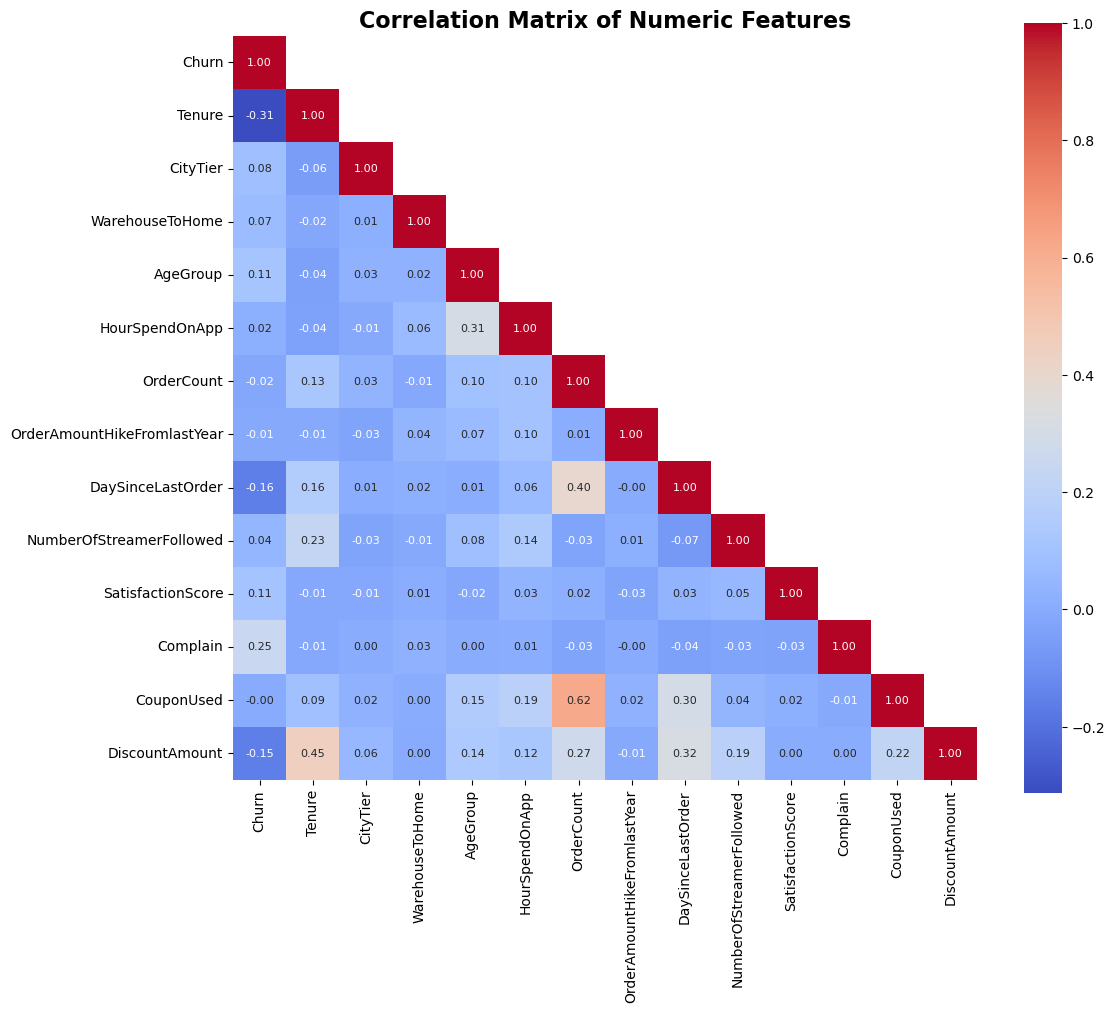

In [3]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.drop(columns=['CustomerID']).corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True, 
            annot_kws={"size": 8}, mask=np.triu(correlation_matrix, k=1))
plt.title('Correlation Matrix of Numeric Features', fontsize=16, fontweight='bold')
plt.show()


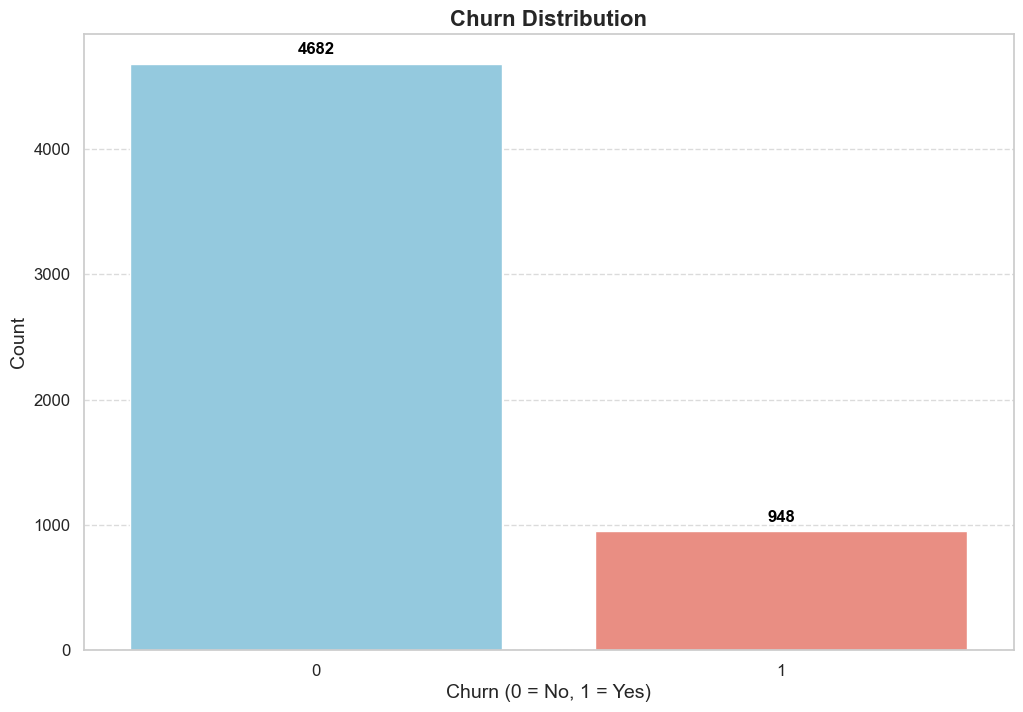

In [4]:
# Set style for more appealing visualizations
sns.set(style='whitegrid')

# Churn Distribution
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='Churn', data=df_cleaned, palette=['skyblue', 'salmon'], edgecolor=None)
plt.title('Churn Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Churn (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12, color='black', fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


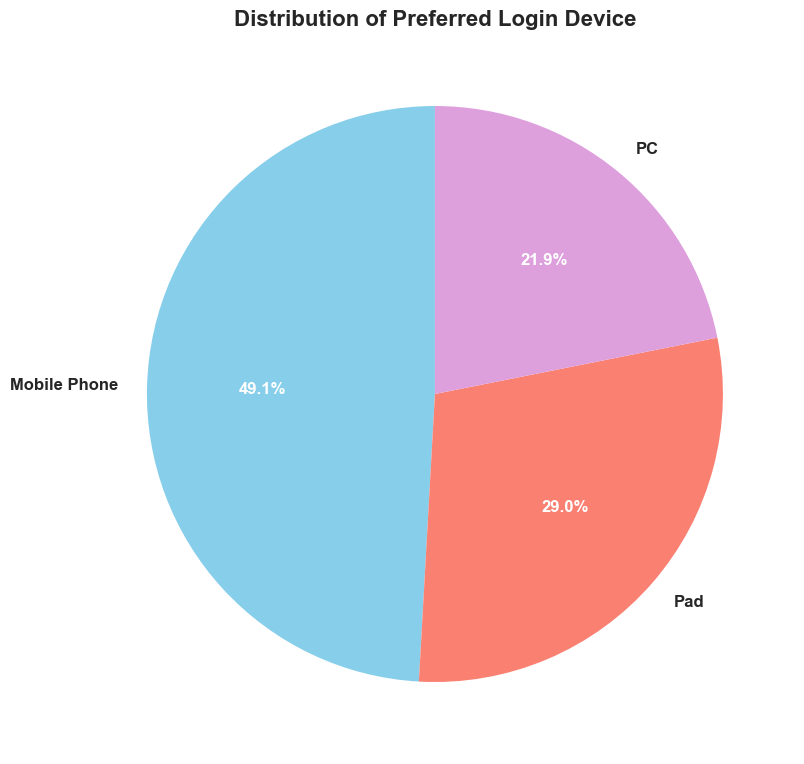

In [5]:
# Distribution of Preferred Login Device
device_counts = df_cleaned['PreferredLoginDevice'].value_counts()
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', startangle=90, 
                                    colors=['skyblue', 'salmon', 'plum'], wedgeprops={'edgecolor': 'none'})
plt.title('Distribution of Preferred Login Device', fontsize=16, fontweight='bold')

for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('bold')
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')
    autotext.set_color('white')

plt.tight_layout()
plt.gca().set_aspect('equal')
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
plt.show()

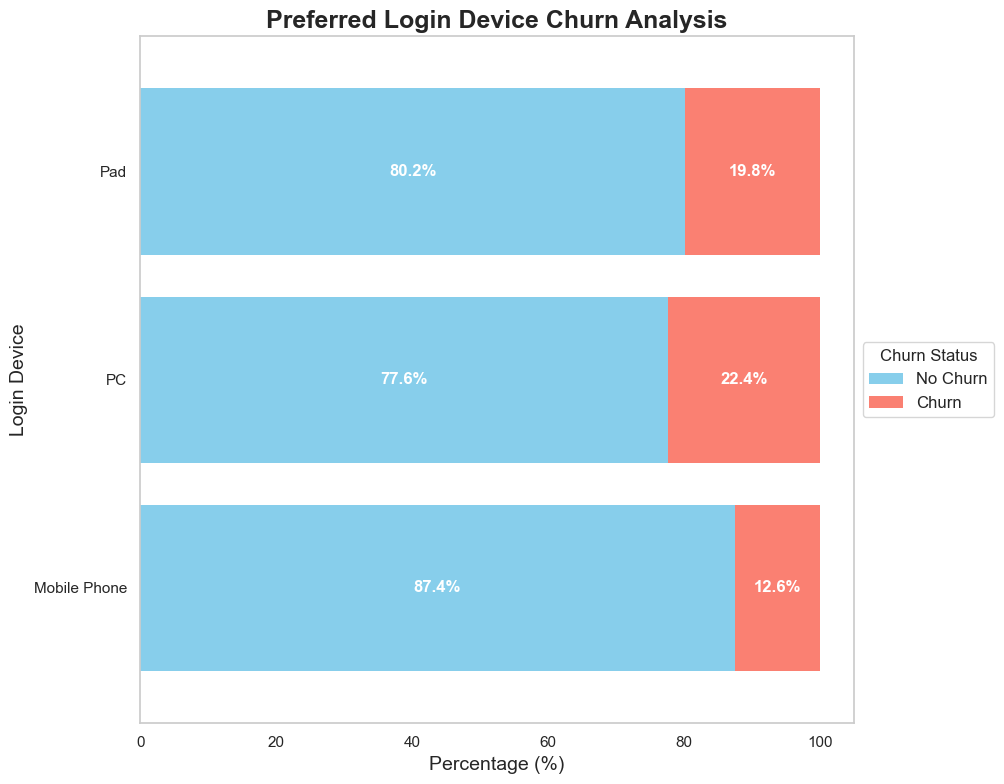

In [6]:
# Churn Rate by Device Type
device_churn = df_cleaned.groupby('PreferredLoginDevice')['Churn'].value_counts(normalize=True).unstack(fill_value=0) * 100
device_churn.columns = ['No Churn', 'Churn']  # Rename columns for easier access

# Plot the data with an updated color scheme and improved layout
ax = device_churn.plot(
    kind='barh', 
    stacked=True, 
    color=['skyblue', 'salmon'],  
    edgecolor='none',  
    width=0.8, 
    figsize=(12, 8)
)
plt.title('Preferred Login Device Churn Analysis', fontsize=18, fontweight='bold')
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('Login Device', fontsize=14)
plt.legend(['No Churn', 'Churn'], title='Churn Status', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)  # Move legend outside

# Add centered percentage labels
for i, (index, row) in enumerate(device_churn.iterrows()):
    # Position the 'No Churn' label at the center of the 'No Churn' bar
    ax.text(row['No Churn'] / 2, i, f'{row["No Churn"]:.1f}%', 
            color='white' if row['No Churn'] > 10 else 'black', va='center', ha='center', fontweight='bold')
    
    # Position the 'Churn' label at the center of the 'Churn' bar
    ax.text(row['No Churn'] + row['Churn'] / 2, i, f'{row["Churn"]:.1f}%', 
            color='white' if row['Churn'] > 10 else 'black', va='center', ha='center', fontweight='bold')

# Set y-axis labels and adjust layout
ax.set_yticks(range(len(device_churn.index)))
ax.set_yticklabels(device_churn.index)
plt.grid(visible=False)  # Remove grid for a cleaner look

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to fit the legend
plt.show()


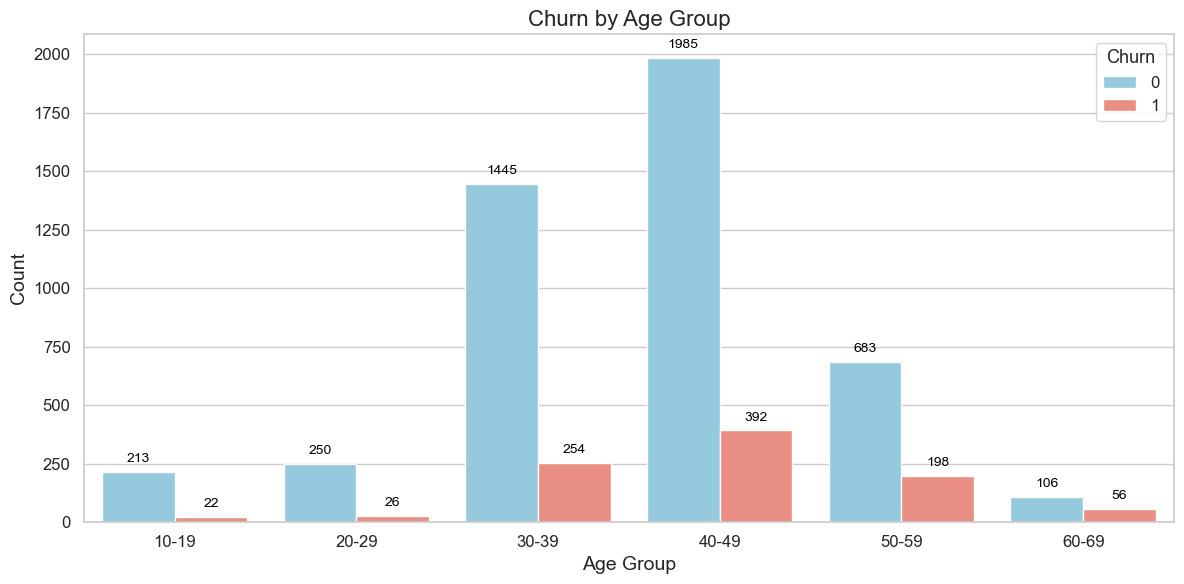

In [7]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Setting a clean style

# Plot the data without remapping AgeGroup
ax = sns.countplot(x='AgeGroup', hue='Churn', data=df_cleaned, palette=['skyblue', 'salmon'], edgecolor=None)

# Adding count labels to each bar
for p in ax.patches:
    if p.get_height() > 0:  # Only annotate bars with height greater than 0
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom',
                    fontsize=10, color='black',
                    xytext=(0, 5),
                    textcoords='offset points')

age_labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69']
# Set custom labels with fixed tick positions
plt.xticks(ticks=ax.get_xticks(), labels=age_labels)

# Improving the appearance of the plot
plt.title('Churn by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Churn', fontsize=12, title_fontsize='13')

plt.tight_layout()
plt.show()


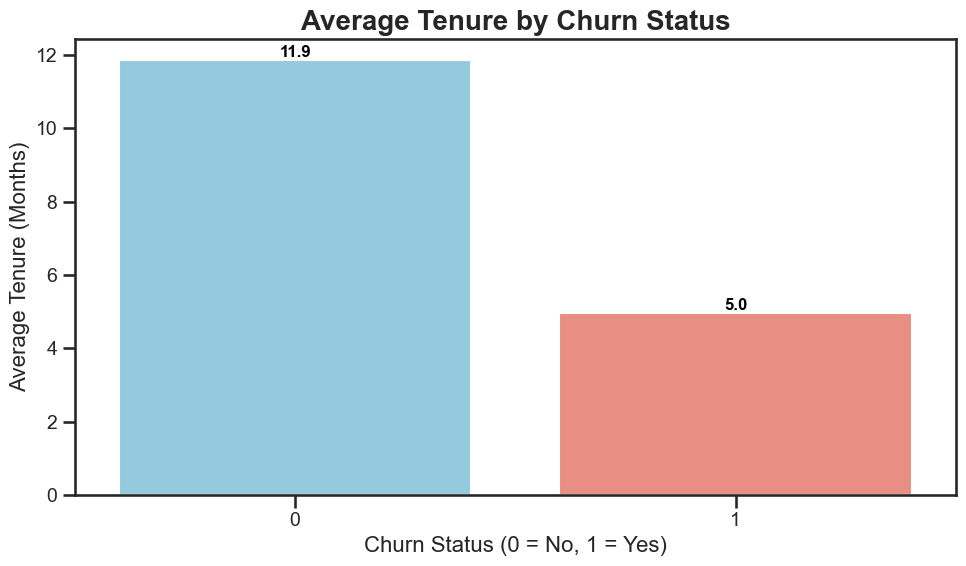

In [8]:
tenure_churn = df_cleaned.groupby('Churn')['Tenure'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.set(style="ticks", context="talk")  # Set a cleaner style and larger context

# Changing to a horizontal barplot for better readability
ax = sns.barplot(x='Churn', y='Tenure', data=tenure_churn, palette=['skyblue', 'salmon'])

# Adding count labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}',
                (p.get_x() + p.get_width() / 2., p.get_height() ),
                ha='center', va='bottom',
                fontsize=12, color='black', weight='bold')

# Improving the appearance of the plot
plt.title('Average Tenure by Churn Status', fontsize=20, weight='bold')
plt.xlabel('Churn Status (0 = No, 1 = Yes)', fontsize=16)
plt.ylabel('Average Tenure (Months)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()

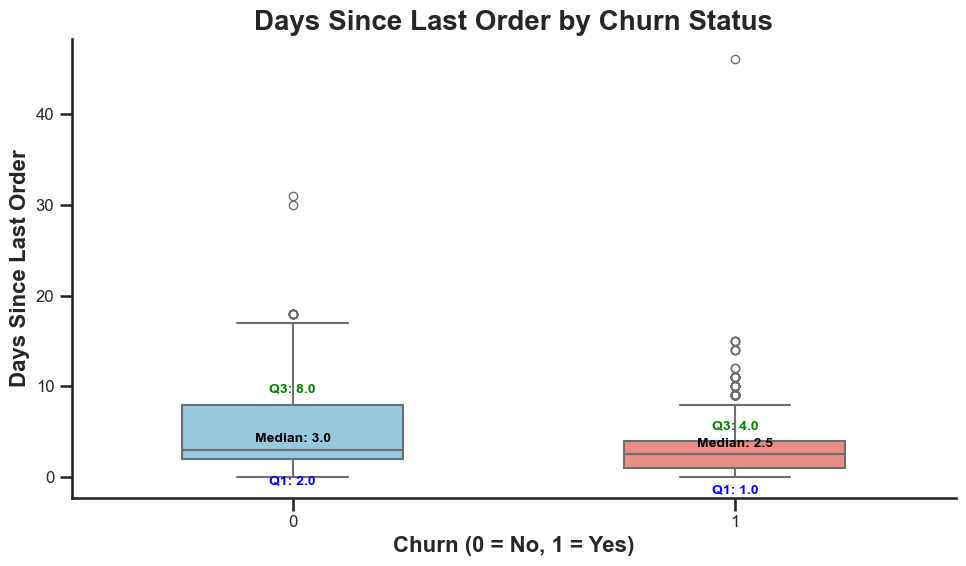

In [9]:

# Days Since Last Order by Churn Status
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid", context="talk", font_scale=1.1)  # Set a cleaner style, larger context, and moderate font scale
sns.set(style="ticks", context="talk") 
# Boxplot for Days Since Last Order by Churn Status
ax = sns.boxplot(x='Churn', y='DaySinceLastOrder', data=df_cleaned, palette=['skyblue', 'salmon'], width=0.5, linewidth=1.5, fliersize=6, notch=False)

# Adding statistical labels (median, Q1, Q3) to the boxplot
medians = df_cleaned.groupby(['Churn'])['DaySinceLastOrder'].median().values
q1 = df_cleaned.groupby(['Churn'])['DaySinceLastOrder'].quantile(0.25).values
q3 = df_cleaned.groupby(['Churn'])['DaySinceLastOrder'].quantile(0.75).values

for xtick in range(len(medians)):
    median = medians[xtick]
    ax.text(xtick, median + 0.5, f'Median: {median:.1f}',
            ha='center', va='bottom',
            fontsize=10, color='black', weight='bold')
    ax.text(xtick, q1[xtick] - 1.8, f'Q1: {q1[xtick]:.1f}',
            ha='center', va='top',
            fontsize=10, color='blue', weight='bold')
    ax.text(xtick, q3[xtick] + 1, f'Q3: {q3[xtick]:.1f}',
            ha='center', va='bottom',
            fontsize=10, color='green', weight='bold')

# Improving the appearance of the plot
plt.title('Days Since Last Order by Churn Status', fontsize=20, weight='bold')
plt.xlabel('Churn (0 = No, 1 = Yes)', fontsize=16, weight='bold')
plt.ylabel('Days Since Last Order', fontsize=16, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Remove top and right spines for a cleaner look
sns.despine()

plt.tight_layout()
plt.show()

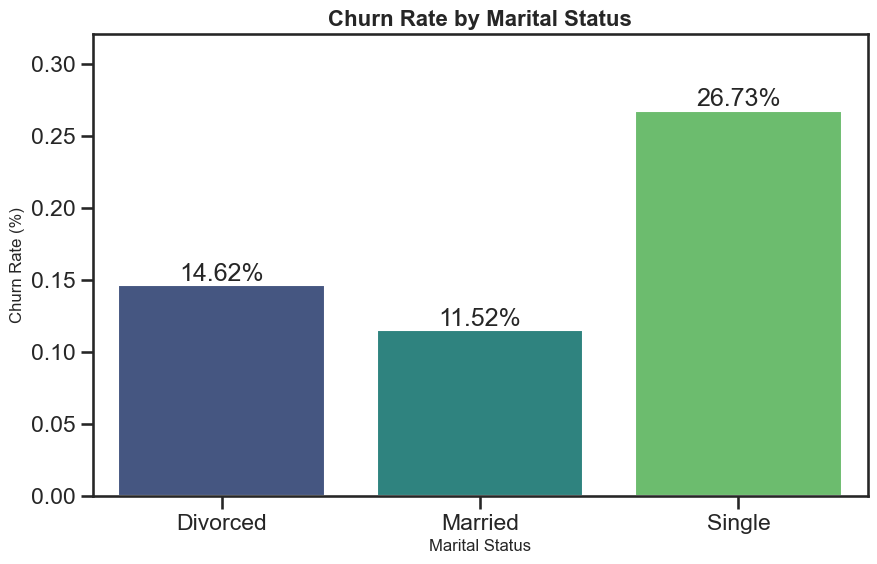

In [10]:
# Churn Rate by Marital Status
churn_rate_per_marital_status = df_cleaned.groupby('MaritalStatus')['Churn'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(
    x='MaritalStatus', 
    y='Churn', 
    data=churn_rate_per_marital_status, 
    palette='viridis'
)

for index, row in churn_rate_per_marital_status.iterrows():
    plt.text(index, row['Churn'], f"{row['Churn']:.2%}", ha='center', va='bottom')

plt.title('Churn Rate by Marital Status', fontsize=16, fontweight='bold')
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.ylim(0, churn_rate_per_marital_status['Churn'].max() * 1.2)  
plt.show()

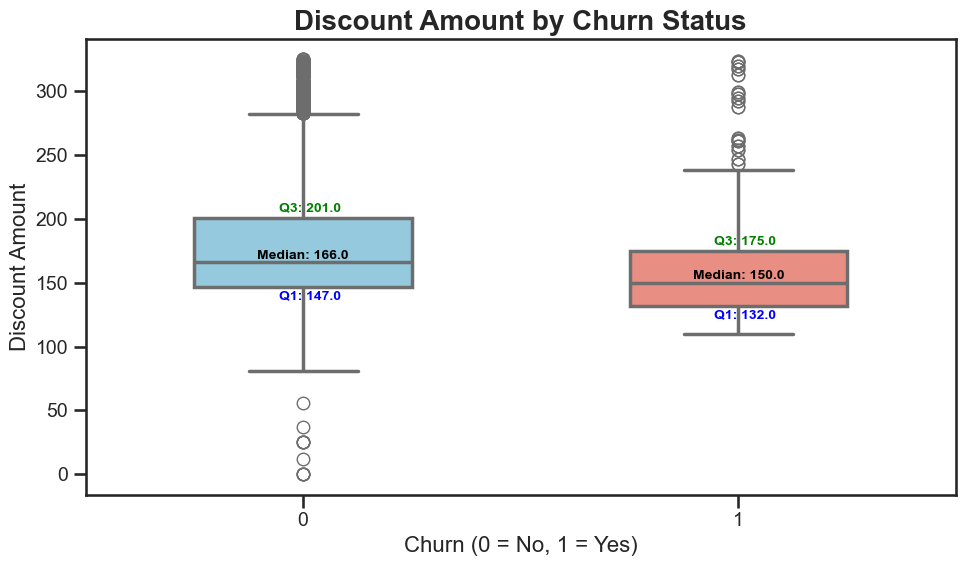

In [11]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid", context="talk")  # Set a cleaner style and larger context
sns.set(style="ticks", context="talk") 
# Boxplot for Discount Amount by Churn Status
ax = sns.boxplot(x='Churn', y='DiscountAmount', data=df_cleaned, palette=['skyblue', 'salmon'], width=0.5, linewidth=2.5)

# Adding median labels to the boxplot
medians = df_cleaned.groupby(['Churn'])['DiscountAmount'].median().values
q1 = df_cleaned.groupby(['Churn'])['DiscountAmount'].quantile(0.25).values
q3 = df_cleaned.groupby(['Churn'])['DiscountAmount'].quantile(0.75).values
for xtick, median in enumerate(medians):
    ax.text(xtick, median+5, f'Median: {median:.1f}',
            ha='center', va='center',
            fontsize=10, color='black', weight='bold')
    ax.text(xtick+0.015, q1[xtick] - 3, f'Q1: {q1[xtick]:.1f}',
            ha='center', va='top',
            fontsize=10, color='blue', weight='bold')
    ax.text(xtick+0.015, q3[xtick] + 3, f'Q3: {q3[xtick]:.1f}',
            ha='center', va='bottom',
            fontsize=10, color='green', weight='bold')

# Improving the appearance of the plot
plt.title('Discount Amount by Churn Status', fontsize=20, weight='bold')
plt.xlabel('Churn (0 = No, 1 = Yes)', fontsize=16)
plt.ylabel('Discount Amount', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()

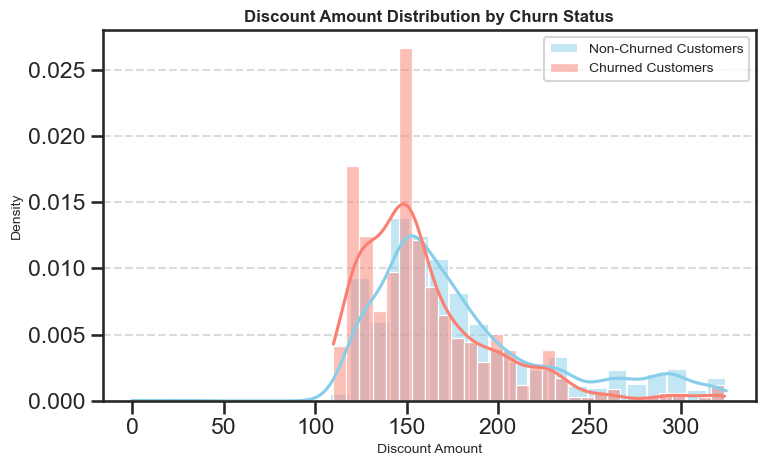

In [12]:
plt.figure(figsize=(8, 5))

# Calculate the total counts for each category
total_non_churned = df_cleaned[df_cleaned['Churn'] == 0].shape[0]
total_churned = df_cleaned[df_cleaned['Churn'] == 1].shape[0]

# Plot the distribution for Non-Churned Customers
sns.histplot(df_cleaned[df_cleaned['Churn'] == 0]['DiscountAmount'], kde=True, color='skyblue', bins=30, label='Non-Churned Customers', stat='density')

# Plot the distribution for Churned Customers
sns.histplot(df_cleaned[df_cleaned['Churn'] == 1]['DiscountAmount'], kde=True, color='salmon', bins=30, label='Churned Customers', stat='density')

# Set titles and labels
plt.title('Discount Amount Distribution by Churn Status', fontsize=12, fontweight='bold')
plt.xlabel('Discount Amount', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()

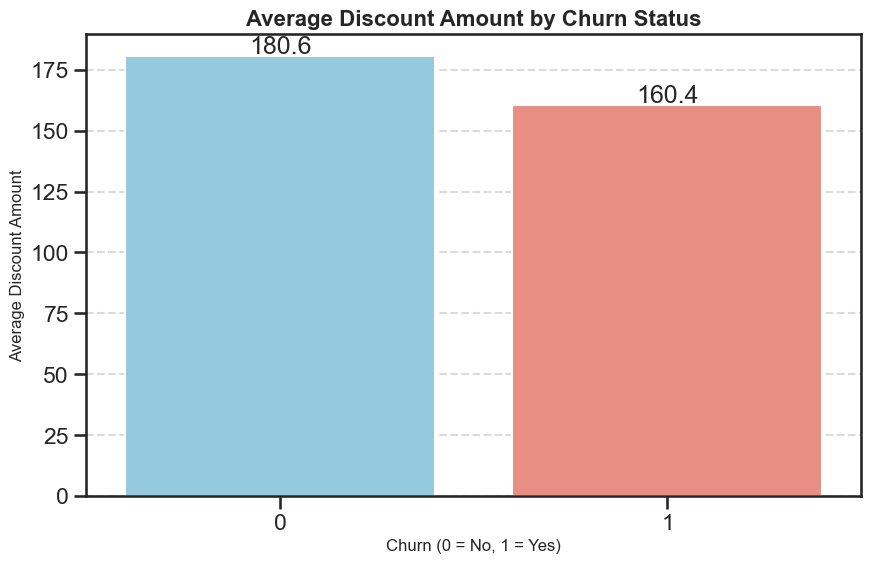

In [13]:
# Average Discount Amount by Churn Status
avg_discount_by_churn = df_cleaned.groupby('Churn')['DiscountAmount'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Churn', y='DiscountAmount', data=avg_discount_by_churn, palette=['skyblue', 'salmon'])

for index, row in avg_discount_by_churn.iterrows():
    plt.text(index, row['DiscountAmount']-1, f"{row['DiscountAmount']:.1f}", ha='center', va='bottom')

plt.title('Average Discount Amount by Churn Status', fontsize=16, fontweight='bold')
plt.xlabel('Churn (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Average Discount Amount', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

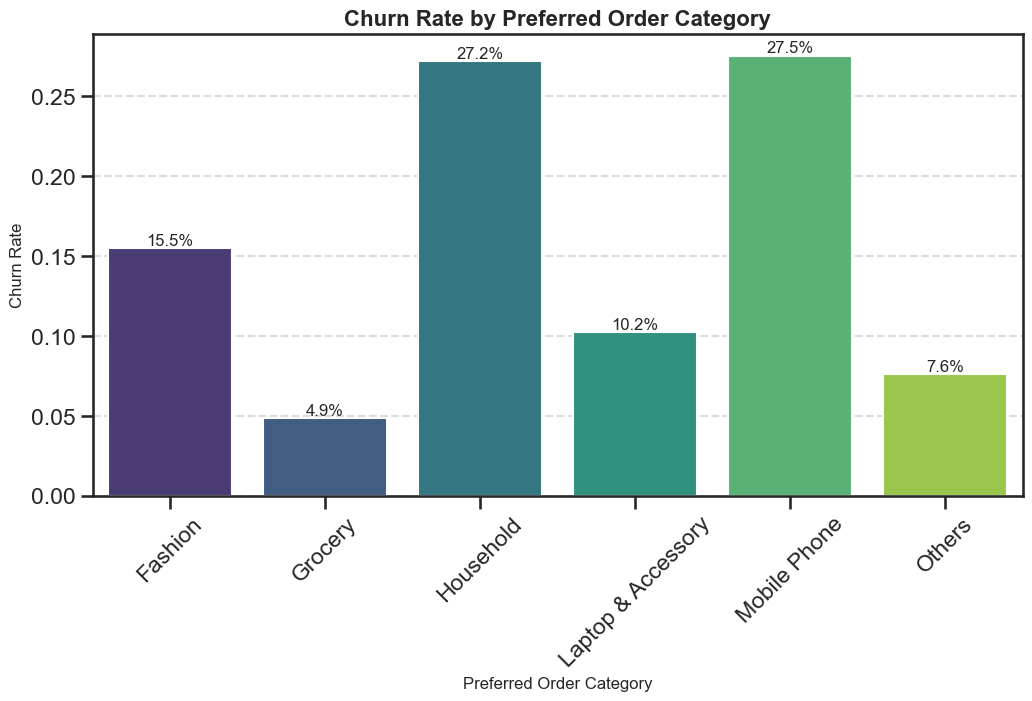

In [14]:
churn_rate_per_order_cat = df.groupby('PreferedOrderCat')['Churn'].mean().reset_index()


plt.figure(figsize=(12, 6))
sns.barplot(x='PreferedOrderCat', y='Churn', data=churn_rate_per_order_cat, palette='viridis')
for index, row in churn_rate_per_order_cat.iterrows():
    plt.text(index, row['Churn'], f"{row['Churn'] * 100:.1f}%", ha='center', va='bottom',fontsize=12)


plt.title('Churn Rate by Preferred Order Category', fontsize=16, fontweight='bold')
plt.xlabel('Preferred Order Category', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

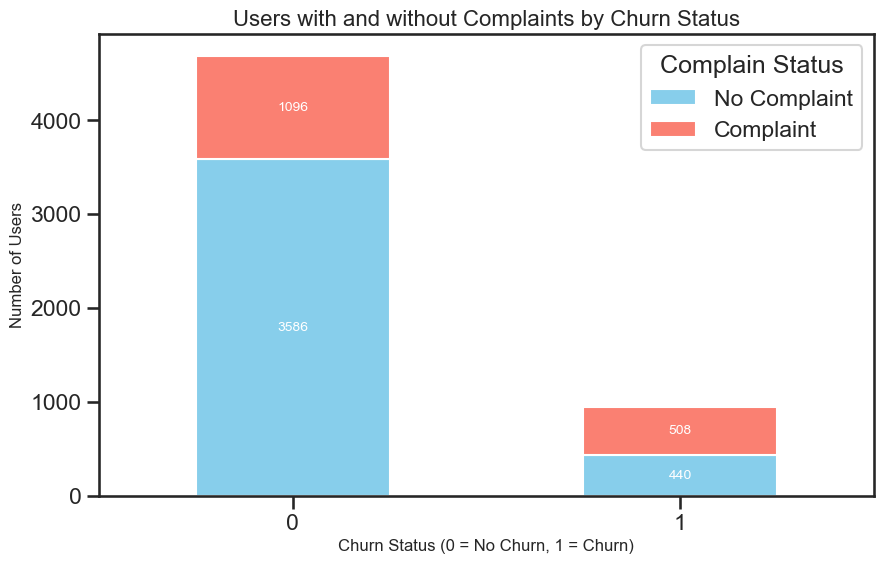

In [15]:
complain_churn_counts = df.groupby(['Churn', 'Complain']).size().unstack()

ax = complain_churn_counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(10, 6))
plt.title('Users with and without Complaints by Churn Status', fontsize=16)
plt.xlabel('Churn Status (0 = No Churn, 1 = Churn)', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.legend(['No Complaint', 'Complaint'], title='Complain Status', loc='upper right')
plt.xticks(rotation=0)


for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{int(height)}', ha='center', va='center', color='white', fontsize=10)

plt.show()

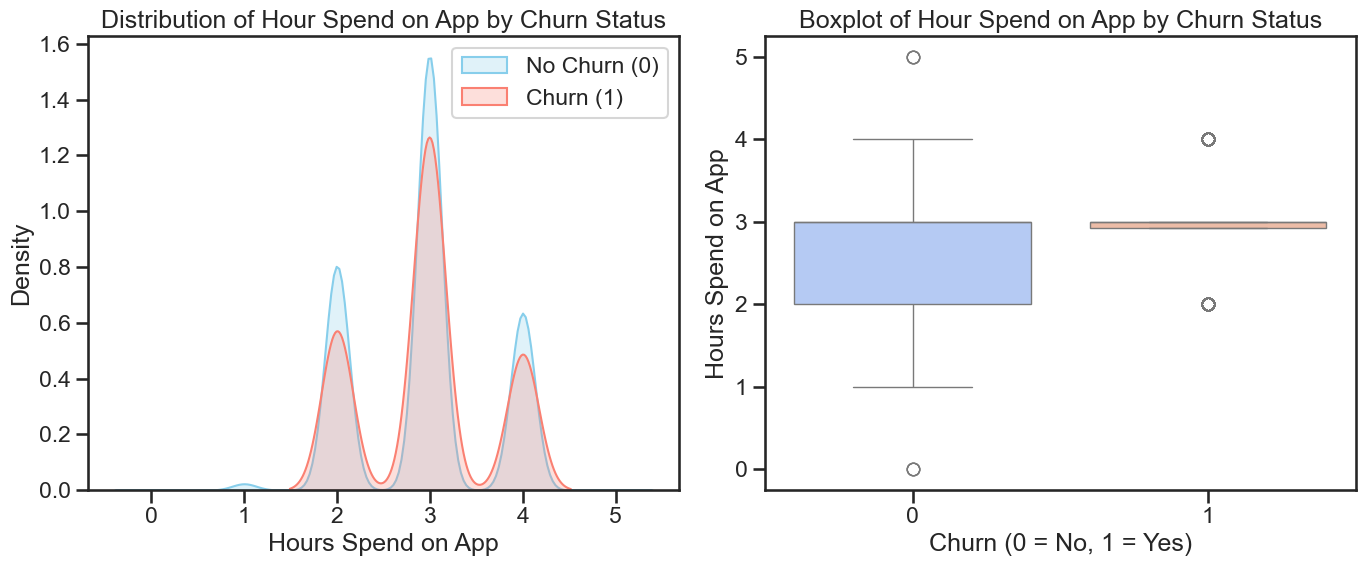

In [16]:
plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
sns.kdeplot(data=df_cleaned[df_cleaned['Churn'] == 0], x='HourSpendOnApp', fill=True, label='No Churn (0)', color='skyblue')
sns.kdeplot(data=df_cleaned[df_cleaned['Churn'] == 1], x='HourSpendOnApp', fill=True, label='Churn (1)', color='salmon')
plt.title('Distribution of Hour Spend on App by Churn Status')
plt.xlabel('Hours Spend on App')
plt.ylabel('Density')
plt.legend()


plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='HourSpendOnApp', data=df_cleaned, palette='coolwarm')
plt.title('Boxplot of Hour Spend on App by Churn Status')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Hours Spend on App')


plt.tight_layout()
plt.show()

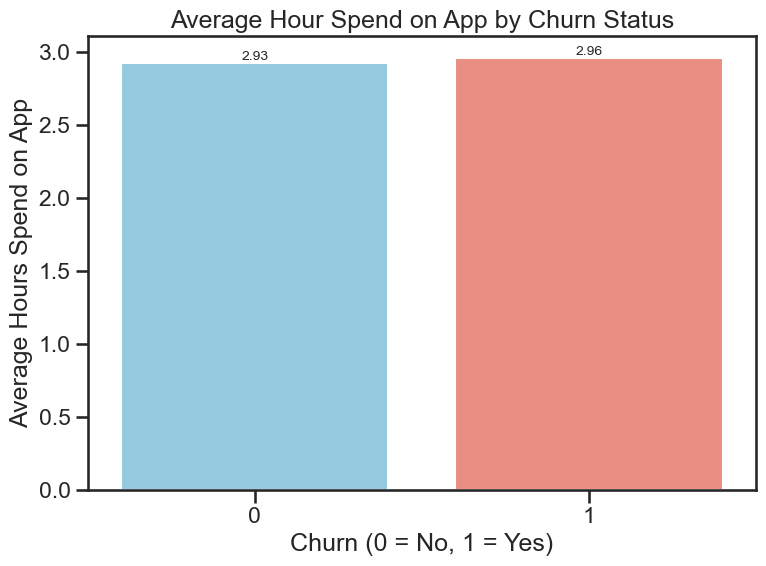

In [17]:
plt.figure(figsize=(8, 6))
mean_values = df_cleaned.groupby('Churn')['HourSpendOnApp'].mean().reset_index()

sns.barplot(x='Churn', y='HourSpendOnApp', data=mean_values, palette=['skyblue', 'salmon'])
plt.title('Average Hour Spend on App by Churn Status')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Average Hours Spend on App')


for index, row in mean_values.iterrows():
    plt.text(index, row['HourSpendOnApp'], f"{row['HourSpendOnApp']:.2f}", ha='center', va='bottom', fontsize=10)


plt.tight_layout()
plt.show()

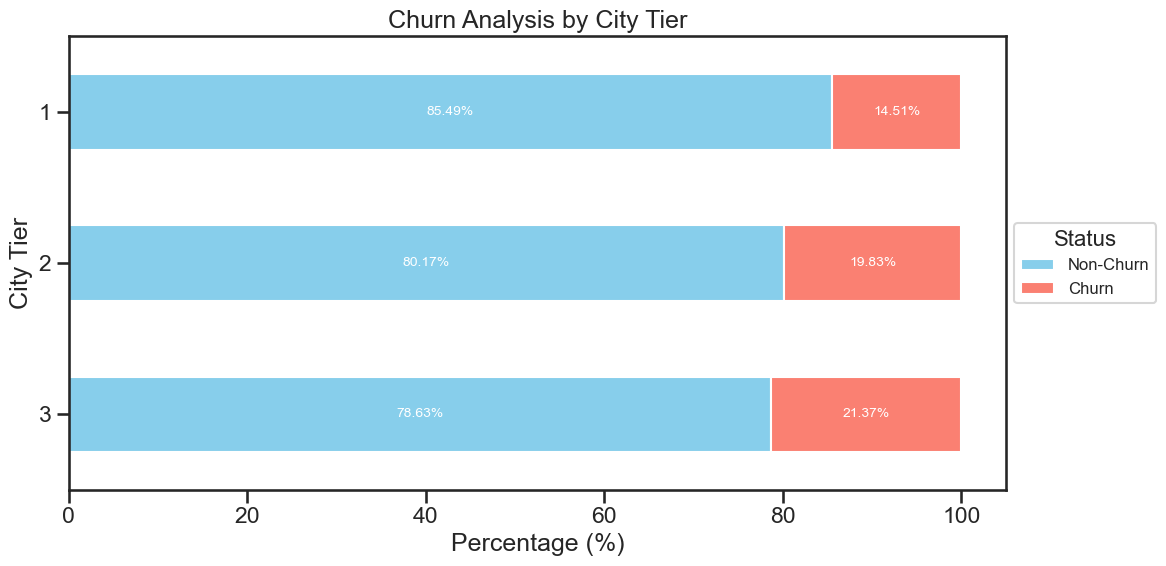

In [18]:
city_tier_churn = df_cleaned.groupby(['CityTier', 'Churn']).size().unstack()
city_tier_churn = city_tier_churn.div(city_tier_churn.sum(axis=1), axis=0) * 100 


plt.figure(figsize=(12, 6))
city_tier_churn.plot(kind='barh', stacked=True, color=['skyblue','salmon'], ax=plt.gca())


for index, (non_churn, churn) in enumerate(zip(city_tier_churn[0], city_tier_churn[1])):
    plt.text(non_churn / 2, index, f"{non_churn:.2f}%", ha='center', va='center', color='white', fontsize=10)
    plt.text(non_churn + (churn / 2), index, f"{churn:.2f}%", ha='center', va='center', color='white', fontsize=10)


plt.title('Churn Analysis by City Tier')
plt.xlabel('Percentage (%)')
plt.ylabel('City Tier')


plt.legend(['Non-Churn', 'Churn'], title='Status', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12, title_fontsize=16)

plt.gca().invert_yaxis() 

plt.tight_layout()
plt.show()

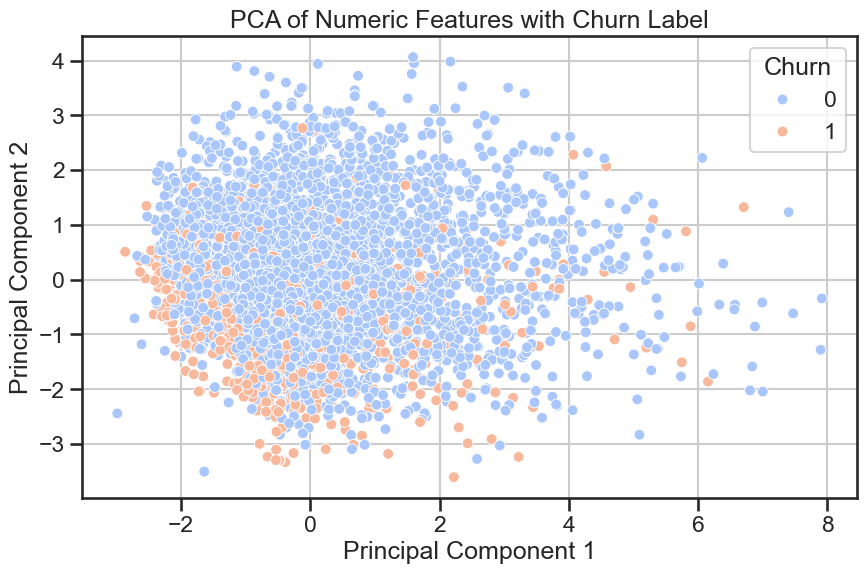

Explained variance by each component: [0.17779635 0.10611559]
Total explained variance: 0.28391193965942957


In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
numeric_features = df_cleaned.select_dtypes(include=['float64', 'int64']).drop(columns=['Churn', 'CustomerID'], errors='ignore')


scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)


pca = PCA(n_components=2)  
pca_components = pca.fit_transform(scaled_features)


pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Churn'] = df_cleaned['Churn'].values 


plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Churn', palette='coolwarm', s=60)
plt.title('PCA of Numeric Features with Churn Label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Churn')
plt.grid(True)
plt.show()


explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component:", explained_variance)
print("Total explained variance:", explained_variance.sum())

### Model Configuration and Training

This pipeline outlines the setup, training, and evaluation process for multiple machine learning models aimed at predicting customer churn. It includes key elements such as feature preprocessing, hyperparameter tuning, and model evaluation, both with and without data balancing using SMOTE.

#### Key Sections:

1. **Random State Definition**  
   - `RANDOM_STATE` is set to 42 for reproducibility across model training processes.

2. **Model Mapping and Definition**  
   - Models and their associated hyperparameter grids are defined, covering a range of classifiers, including:
     - Logistic Regression
     - Random Forest
     - Support Vector Machine
     - K-Nearest Neighbors
     - Gradient Boosting
     - XGBoost
     - AdaBoost
     - LightGBM

3. **Data Preprocessing Pipeline**  
   - Features are processed through a `ColumnTransformer` for numerical and categorical transformations, including:
     - **Numerical:** Median imputation and standard scaling
     - **Categorical:** Most-frequent imputation and one-hot encoding

4. **Train-Test Split**  
   - The dataset is split into training and testing sets to evaluate model performance.

5. **Training and Evaluation with SMOTE**  
   - A function `train_and_evaluate` iterates over the models, applying cross-validated hyperparameter tuning, and outputs performance metrics (F1 Score, ROC-AUC).
   - Feature importances are extracted and visualized for models that support it.

6. **Performance Comparison with and without SMOTE**  
   - The impact of SMOTE on model performance is visualized using F1 and ROC-AUC scores.
   - Feature importance is averaged and visualized across all models, highlighting the top 10 most impactful features.

#### Visualization
Performance and feature importance plots provide insights into each model's effectiveness, with scatter plots comparing performance metrics and bar charts displaying the significance of individual features.



In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier


from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [21]:
# Set the random state
RANDOM_STATE = 42

# Model name and model object mapping
map_model_name = {
    'lr': 'Logistic Regression',
    'rf': 'Random Forest',
    'svc': 'Support Vector Machine',
    'knn': 'K-Nearest Neighbors',
    'gb': 'Gradient Boosting',
    'xgb': 'XGBoost',
    'ada': 'AdaBoost',
    'lgbm': 'LightGBM'
}

# Define the models
models = {
    'lr': LogisticRegression(max_iter=1000, random_state=RANDOM_STATE), # Logistic Regression
    'rf': RandomForestClassifier(random_state=RANDOM_STATE), # Random Forest
    'svc': SVC(kernel='linear', random_state=RANDOM_STATE), # Support Vector Machine with linear kernel
    'knn': KNeighborsClassifier(), # K-Nearest Neighbors
    'gb': GradientBoostingClassifier(random_state=RANDOM_STATE), # Gradient Boosting
    'xgb': XGBClassifier(eval_metric='logloss', random_state=RANDOM_STATE), # XGBoost
    'ada': AdaBoostClassifier(random_state=RANDOM_STATE), # AdaBoost
    'lgbm': LGBMClassifier(random_state=RANDOM_STATE, verbose=-1) # LightGBM
}

# Define balanced hyperparameter grids

# Logistic Regression
lr_param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10]
}

# Random Forest
rf_param_grid = {
    'classifier__n_estimators': [100, 150, 200],
    'classifier__max_depth': [None, 10, 20]
}

# Support Vector Machine
svc_param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf']
}

# K-Nearest Neighbors
knn_param_grid = {
    'classifier__n_neighbors': [3, 5, 7],
    'classifier__weights': ['uniform', 'distance']
}

# Gradient Boosting
gb_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.05, 0.1, 0.2],
    'classifier__max_depth': [3, 5]
}

# XGBoost
xgb_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.05, 0.1, 0.2],
    'classifier__max_depth': [3, 5]
}

# AdaBoost
ada_param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.1, 0.5, 1]
}

# LightGBM
lgbm_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.05, 0.1, 0.2],
    'classifier__max_depth': [-1, 10]
}

Without SMOTE:
Model: lr
ROC-AUC Score: 0.733724904500675
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       941
           1       0.80      0.49      0.61       185

    accuracy                           0.90      1126
   macro avg       0.85      0.73      0.77      1126
weighted avg       0.89      0.90      0.89      1126

Best Parameters: {'classifier__C': 10}
--------------------------------------------------------------------------------
Model: rf
ROC-AUC Score: 0.9075767584800529
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       941
           1       0.99      0.82      0.90       185

    accuracy                           0.97      1126
   macro avg       0.98      0.91      0.94      1126
weighted avg       0.97      0.97      0.97      1126

Best Parameters: {'classifier__max_depth': 20, 'classifier__n_estimators': 200}
--------------------------------------------

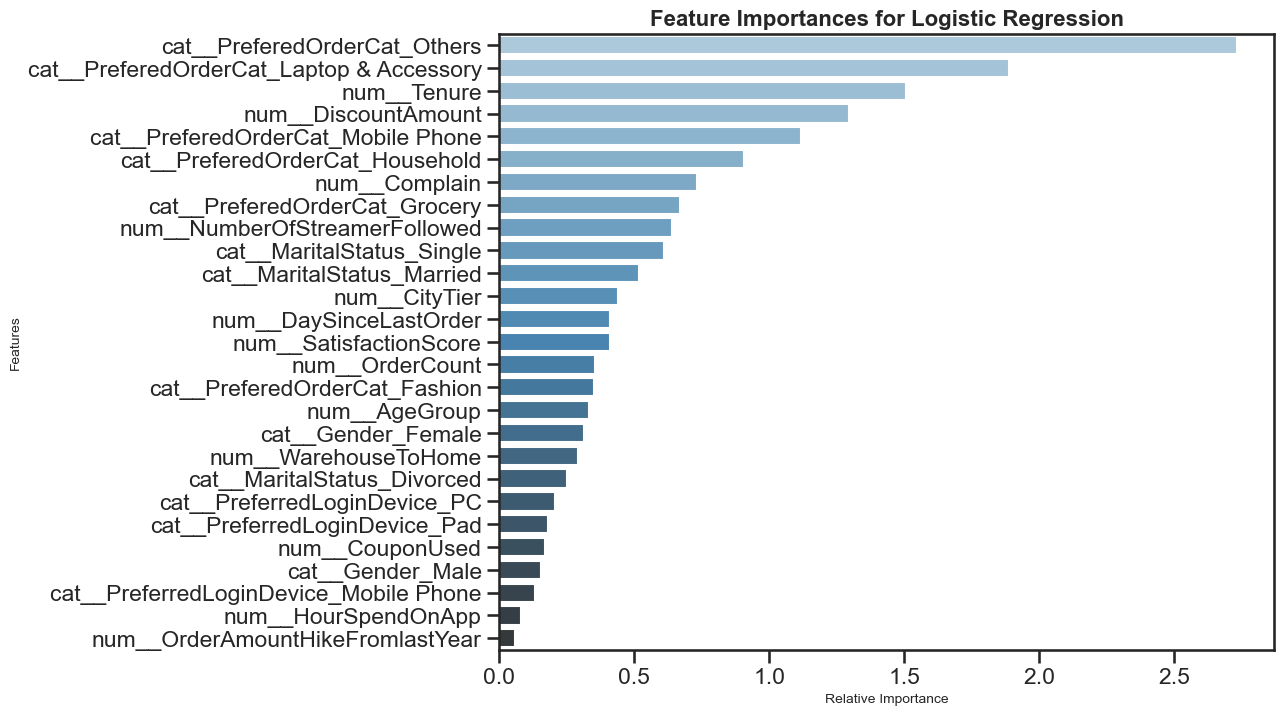

--------------------------------------------------------------------------------
Model: rf
ROC-AUC Score: 0.9287129850360457
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       941
           1       0.96      0.86      0.91       185

    accuracy                           0.97      1126
   macro avg       0.97      0.93      0.95      1126
weighted avg       0.97      0.97      0.97      1126

Best Parameters: {'classifier__max_depth': None, 'classifier__n_estimators': 200}


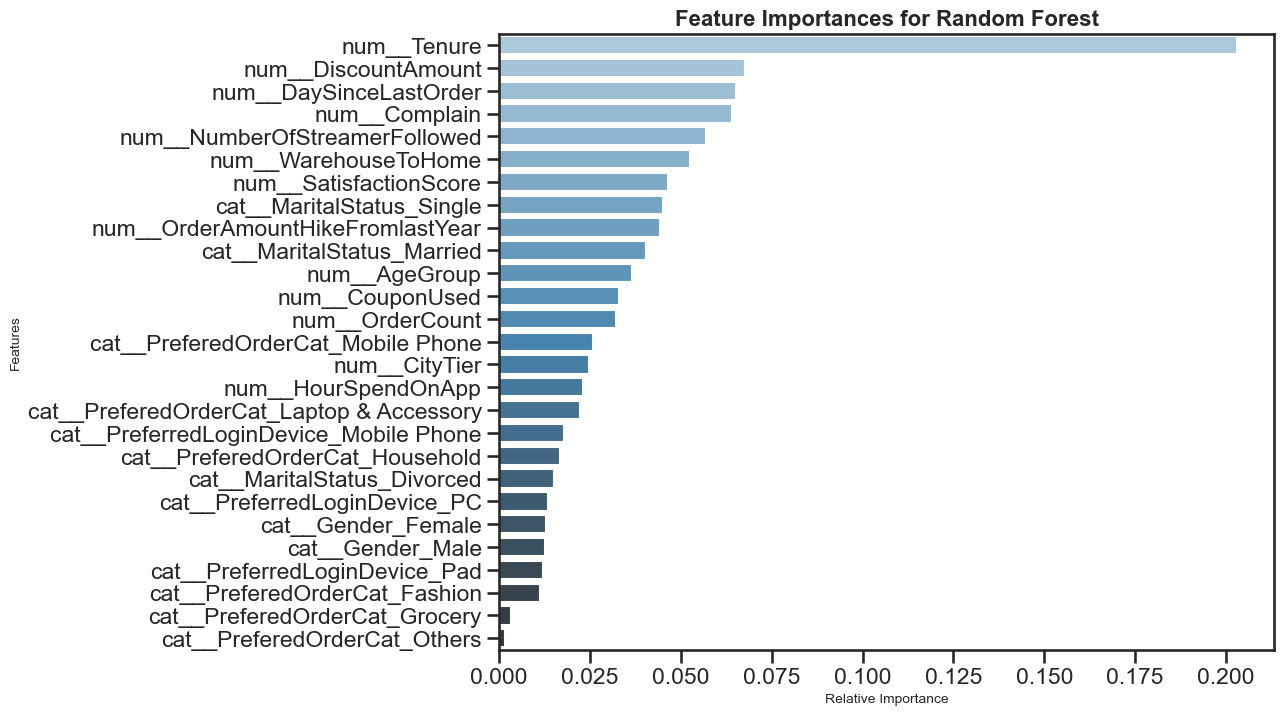

--------------------------------------------------------------------------------
Model: svc
ROC-AUC Score: 0.9127265416319613
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       941
           1       0.83      0.86      0.85       185

    accuracy                           0.95      1126
   macro avg       0.90      0.91      0.91      1126
weighted avg       0.95      0.95      0.95      1126

Best Parameters: {'classifier__C': 10, 'classifier__kernel': 'rbf'}


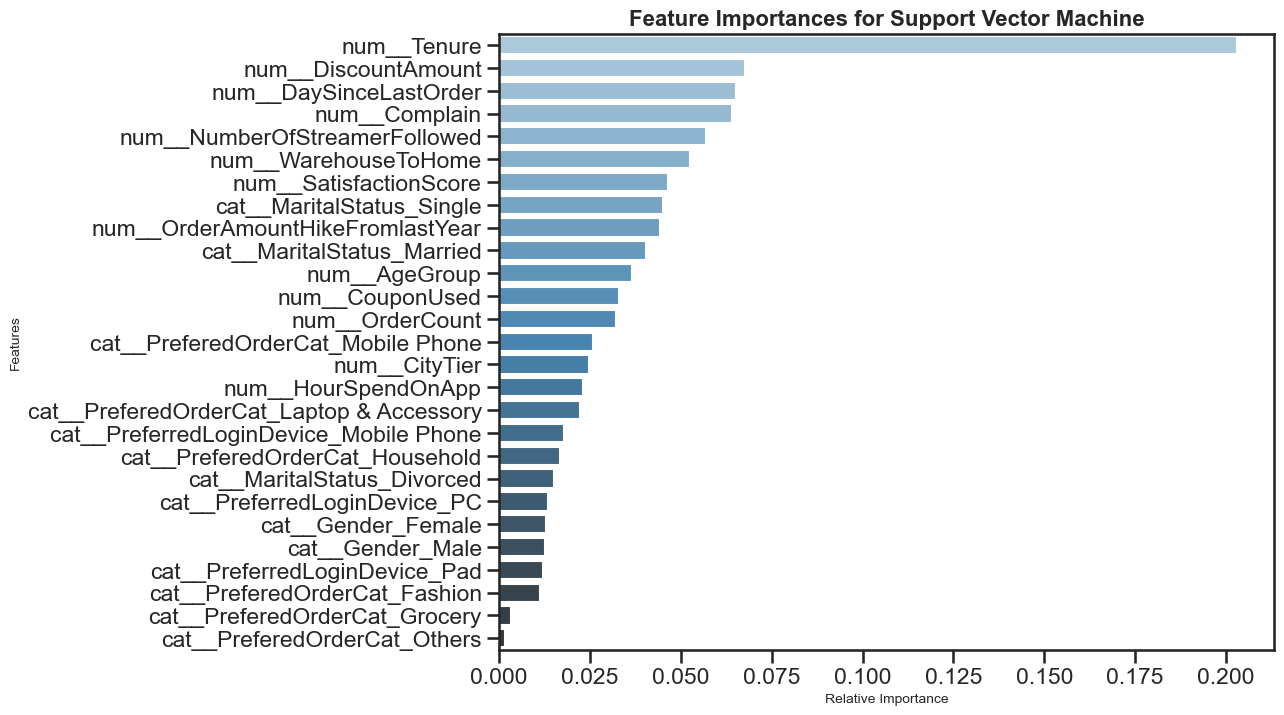

--------------------------------------------------------------------------------
Model: knn
ROC-AUC Score: 0.9167217164029066
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       941
           1       0.75      0.89      0.81       185

    accuracy                           0.93      1126
   macro avg       0.86      0.92      0.89      1126
weighted avg       0.94      0.93      0.94      1126

Best Parameters: {'classifier__n_neighbors': 3, 'classifier__weights': 'distance'}


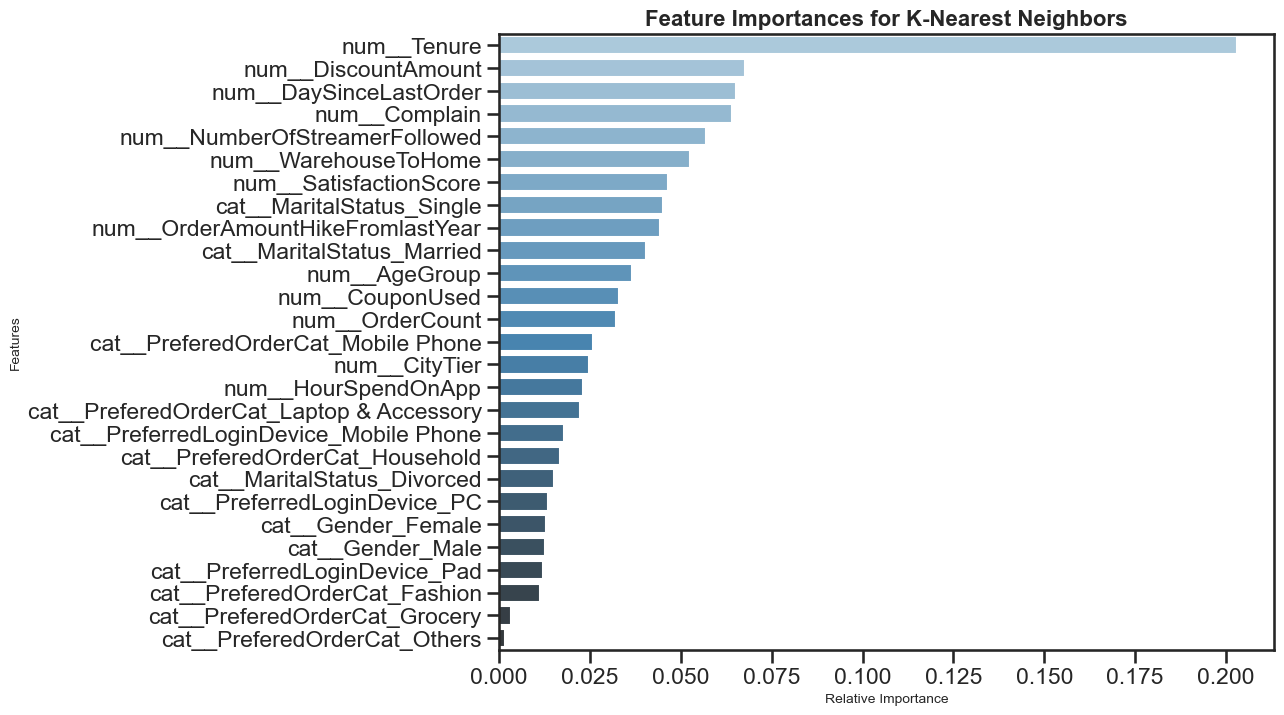

--------------------------------------------------------------------------------
Model: gb
ROC-AUC Score: 0.9357124393256168
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       941
           1       0.98      0.88      0.92       185

    accuracy                           0.98      1126
   macro avg       0.98      0.94      0.95      1126
weighted avg       0.98      0.98      0.98      1126

Best Parameters: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__n_estimators': 200}


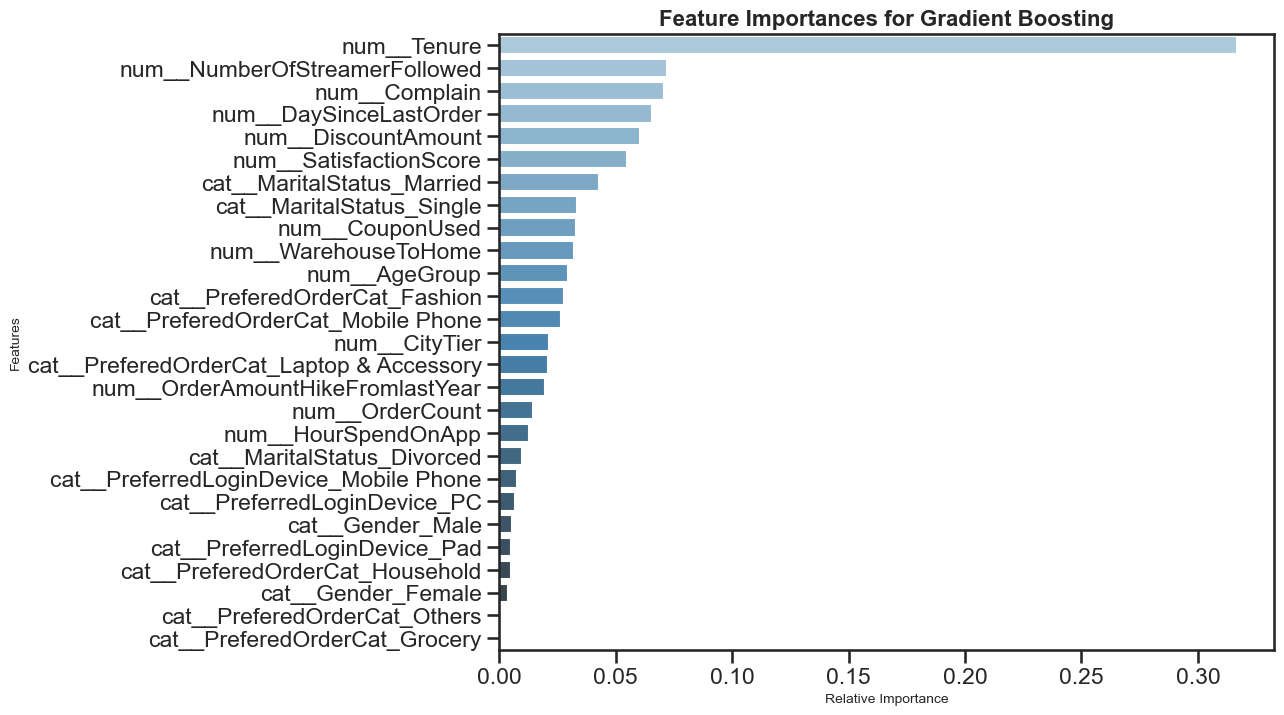

--------------------------------------------------------------------------------
Model: xgb
ROC-AUC Score: 0.9136054226383663
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       941
           1       0.94      0.84      0.89       185

    accuracy                           0.96      1126
   macro avg       0.95      0.91      0.93      1126
weighted avg       0.96      0.96      0.96      1126

Best Parameters: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__n_estimators': 200}


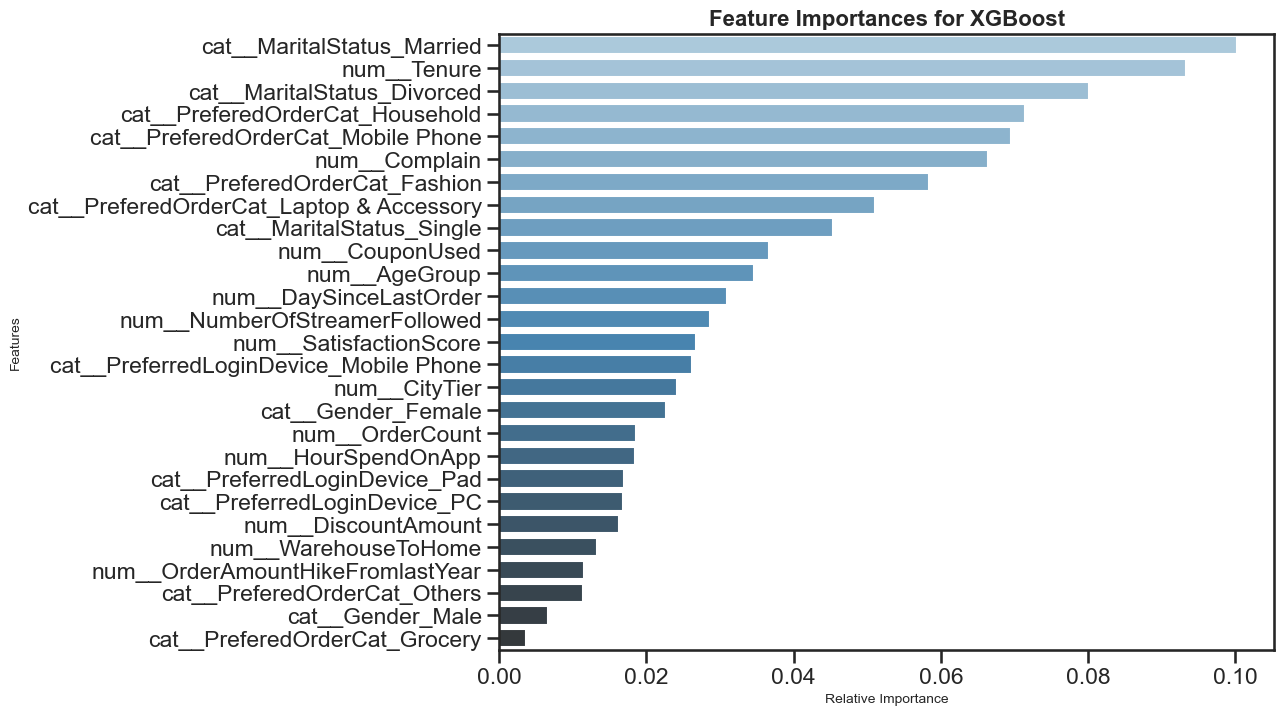

--------------------------------------------------------------------------------
Model: ada
ROC-AUC Score: 0.8075049544762617
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       941
           1       0.70      0.67      0.69       185

    accuracy                           0.90      1126
   macro avg       0.82      0.81      0.81      1126
weighted avg       0.90      0.90      0.90      1126

Best Parameters: {'classifier__learning_rate': 1, 'classifier__n_estimators': 200}


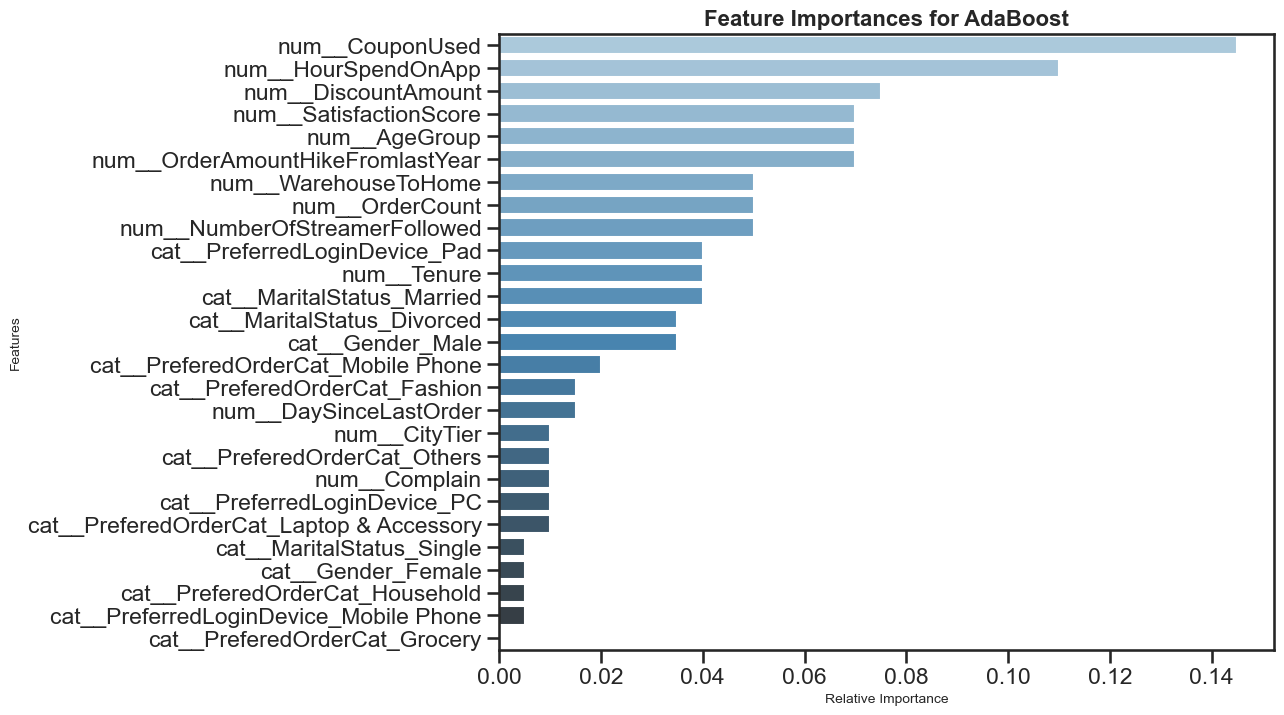

--------------------------------------------------------------------------------
Model: lgbm
ROC-AUC Score: 0.9319470373668035
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       941
           1       0.96      0.87      0.91       185

    accuracy                           0.97      1126
   macro avg       0.97      0.93      0.95      1126
weighted avg       0.97      0.97      0.97      1126

Best Parameters: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 10, 'classifier__n_estimators': 100}


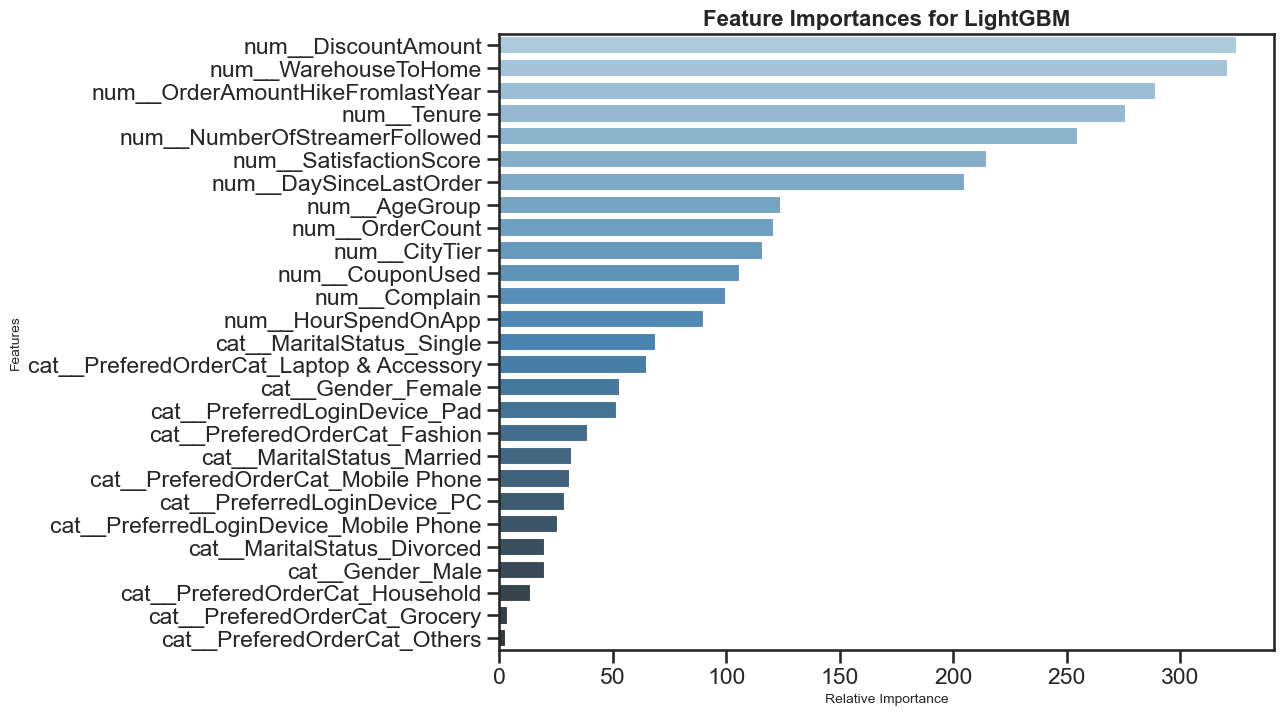

--------------------------------------------------------------------------------


In [22]:
dic_feature_importances = {}
dic_model_performance = {}

# Define the features and target
X = df_cleaned.drop(columns=['Churn', 'CustomerID'], axis=1)
y = df_cleaned['Churn']

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())]), 
         X.select_dtypes(include=['int64', 'float64']).columns),
        
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))]), 
         X.select_dtypes(include=['object']).columns)
    ])

# Transform X before train-test split to avoid data leakage in preprocessor
X_transformed = preprocessor.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=RANDOM_STATE)

# Function to train and evaluate models
def train_and_evaluate(X_train, y_train, X_test, y_test, use_smote):
    if use_smote:
        sm = SMOTE(random_state=RANDOM_STATE)
        X_train, y_train = sm.fit_resample(X_train, y_train)

    dic_feature_importances = {}
    dic_model_performance = {}

    for model_name, model in models.items():
        param_grid = eval(f"{model_name.lower().replace(' ', '_')}_param_grid")

        clf = Pipeline(steps=[('classifier', model)])
        
        cv = GridSearchCV(clf, param_grid, scoring='f1', cv=5)
        cv.fit(X_train, y_train)

        # Evaluate the best model on the test data
        y_pred = cv.predict(X_test)
        f1_score = cv.best_score_
        rocauc_score = roc_auc_score(y_test, y_pred)
        dic_model_performance[model_name] = [f1_score, rocauc_score]

        print(f"Model: {model_name}")    
        print(f'ROC-AUC Score: {rocauc_score}')
        print(classification_report(y_test, y_pred))
        print(f'Best Parameters: {cv.best_params_}')

        # Calculate and visualize feature importances (KNN does not have feature importances)
        best_model = cv.best_estimator_.named_steps['classifier']
        if model_name == 'lr':
            importances = np.abs(best_model.coef_[0])
        elif model_name in ['rf', 'gb', 'xgb', 'ada', 'lgbm']:
            importances = best_model.feature_importances_
        elif model_name == 'svc' and model.kernel != 'linear':
            importances = np.abs(best_model.coef_[0])
            
        features = np.array(preprocessor.get_feature_names_out())
        indices = np.argsort(importances)[::-1]
        if model_name != 'knn' and not(model_name == 'svc' and model.kernel == 'linear'):
            dic_feature_importances[model_name] = [features, importances/sum(importances)]

        if use_smote:
            plt.figure(figsize=(10, 8))
            sns.barplot(x=importances[indices], y=[features[i] for i in indices], palette="Blues_d")
            plt.title(f'Feature Importances for {map_model_name[model_name]}', fontsize=16, fontweight='bold')
            plt.xlabel('Relative Importance', fontsize=10)
            plt.ylabel('Features', fontsize=10)
            plt.show()

        print("-" * 80)

    return dic_model_performance, dic_feature_importances

# Train and evaluate models without SMOTE
print("Without SMOTE:")
dic_model_performance_no_smote, dic_feature_importances_no_smote = train_and_evaluate(X_train, y_train, X_test, y_test, use_smote=False)

# Train and evaluate models with SMOTE
print("With SMOTE:")
dic_model_performance_smote, dic_feature_importances_smote = train_and_evaluate(X_train, y_train, X_test, y_test, use_smote=True)

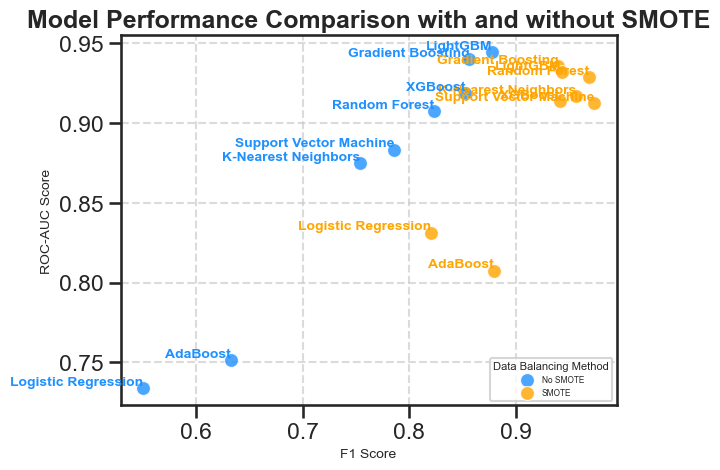

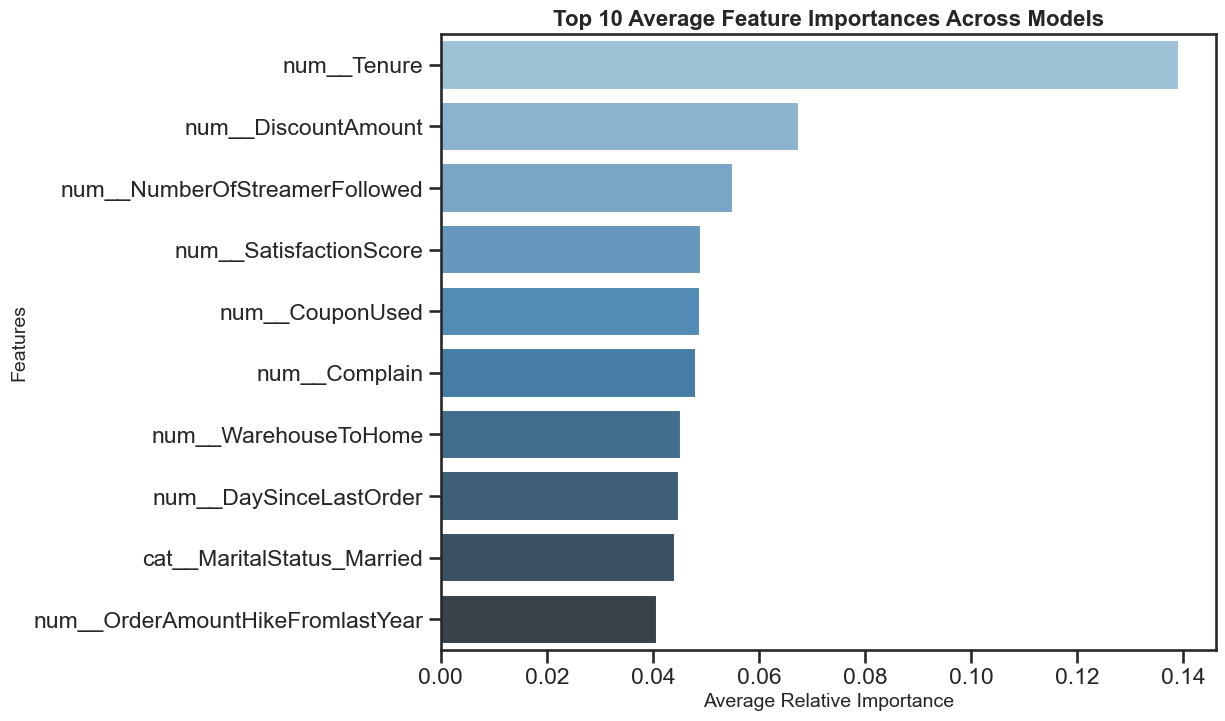

In [23]:

# Plot model performance comparison
performance_df_no_smote = pd.DataFrame(dic_model_performance_no_smote, index=['F1 Score', 'ROC-AUC Score']).T
performance_df_smote = pd.DataFrame(dic_model_performance_smote, index=['F1 Score', 'ROC-AUC Score']).T

sns.scatterplot(data=performance_df_no_smote, x='F1 Score', y='ROC-AUC Score', 
                s=100, color="dodgerblue", alpha=0.8, label='No SMOTE')
sns.scatterplot(data=performance_df_smote, x='F1 Score', y='ROC-AUC Score', 
                s=100, color="orange", alpha=0.8, label='SMOTE')

for i, model_name in enumerate(performance_df_no_smote.index):
    plt.text(performance_df_no_smote['F1 Score'][i], performance_df_no_smote['ROC-AUC Score'][i], 
             f"{map_model_name[model_name]}", fontsize=10, ha='right', va='bottom', fontweight='bold', color="dodgerblue")
    plt.text(performance_df_smote['F1 Score'][i], performance_df_smote['ROC-AUC Score'][i], 
             f"{map_model_name[model_name]}", fontsize=10, ha='right', va='bottom', fontweight='bold', color="orange")

plt.title('Model Performance Comparison with and without SMOTE', fontsize=18, fontweight='bold')
plt.xlabel('F1 Score', fontsize=10)
plt.ylabel('ROC-AUC Score', fontsize=10)
plt.legend(title="Data Balancing Method", title_fontsize=8, fontsize=6, loc='lower right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Plot feature importance across all models using smote
feature_shown = 10
all_importances = np.zeros(len(dic_feature_importances_smote[list(dic_feature_importances_smote.keys())[0]][1]))
for model_name, (features, importances) in dic_feature_importances_smote.items():
    all_importances += importances

average_importances = all_importances / len(dic_feature_importances_smote)
sorted_indices = np.argsort(np.abs(average_importances))[::-1][:feature_shown]

plt.figure(figsize=(10, 8))
sns.barplot(x=average_importances[sorted_indices], y=[features[i] for i in sorted_indices], palette="Blues_d")
plt.title(f'Top {feature_shown} Average Feature Importances Across Models', fontsize=16, fontweight='bold')
plt.xlabel('Average Relative Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.show()

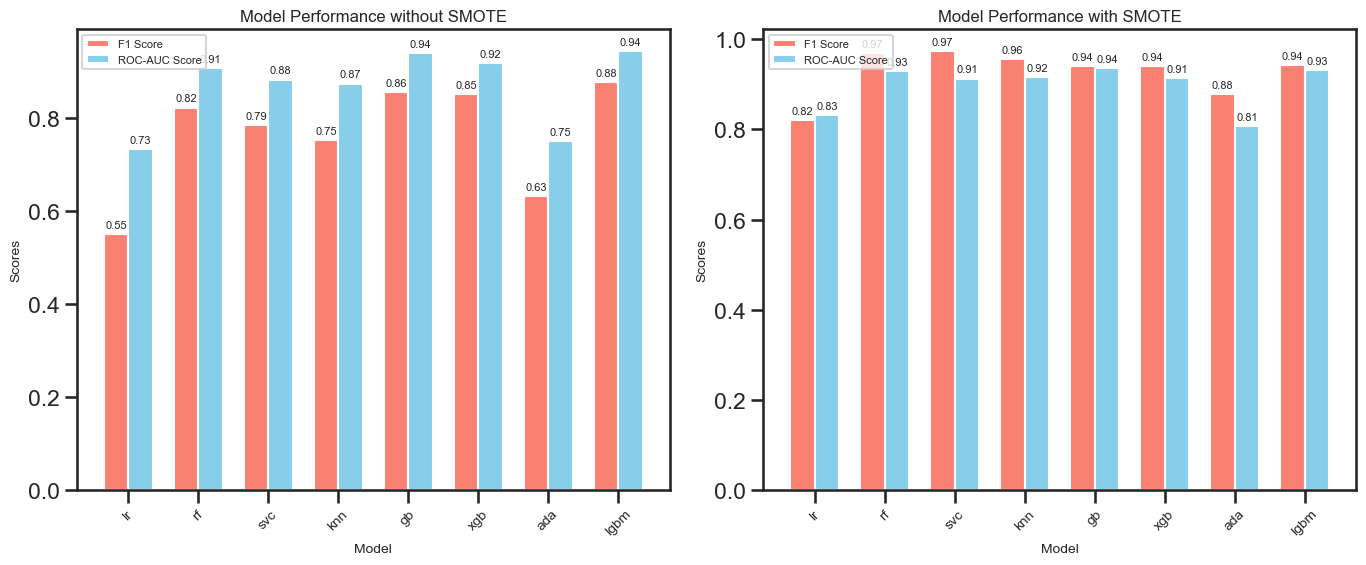

In [24]:
models = list(dic_model_performance_no_smote.keys())
f1_scores_no_smote = [scores[0] for scores in dic_model_performance_no_smote.values()]
roc_auc_scores_no_smote = [scores[1] for scores in dic_model_performance_no_smote.values()]

f1_scores_smote = [scores[0] for scores in dic_model_performance_smote.values()]
roc_auc_scores_smote = [scores[1] for scores in dic_model_performance_smote.values()]

x = np.arange(len(models))
width = 0.35
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# First subgraph: No SMOTE
bars1 = axs[0].bar(x - width/2, f1_scores_no_smote, width, label='F1 Score', color='salmon')
bars2 = axs[0].bar(x + width/2, roc_auc_scores_no_smote, width, label='ROC-AUC Score', color='skyblue')

axs[0].set_xlabel('Model', fontsize=10)
axs[0].set_ylabel('Scores', fontsize=10)
axs[0].set_title('Model Performance without SMOTE', fontsize=12)
axs[0].set_xticks(x)
axs[0].set_xticklabels(models, fontsize=10)
axs[0].legend(fontsize=8)
axs[0].bar_label(bars1, fmt='%.2f', padding=3, fontsize=8)
axs[0].bar_label(bars2, fmt='%.2f', padding=3, fontsize=8)

# Second subgraph: with SMOTE
bars1 = axs[1].bar(x - width/2, f1_scores_smote, width, label='F1 Score', color='salmon')
bars2 = axs[1].bar(x + width/2, roc_auc_scores_smote, width, label='ROC-AUC Score', color='skyblue')

axs[1].set_xlabel('Model', fontsize=10)
axs[1].set_ylabel('Scores', fontsize=10)
axs[1].set_title('Model Performance with SMOTE', fontsize=12)
axs[1].set_xticks(x)
axs[1].set_xticklabels(models, fontsize=10)
axs[1].legend(fontsize=8, loc='upper left')
axs[1].bar_label(bars1, fmt='%.2f', padding=3, fontsize=8)
axs[1].bar_label(bars2, fmt='%.2f', padding=3, fontsize=8)

plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=45)
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=45)
plt.tight_layout()
plt.show()

### Conclusion

#### Model Performance Comparison
From the above results, we can observe notable differences in model performance with and without SMOTE applied to handle class imbalance. The main findings are as follows:

1. **Model Comparison without SMOTE**:
   - The Gradient Boosting (GB) and LightGBM (LGBM) models achieved the highest ROC-AUC scores (`0.94` and `0.944`, respectively), with excellent precision and recall for both classes.
   - The Logistic Regression (LR) model had the lowest ROC-AUC score (`0.733`), showing a relatively lower ability to identify the minority class (class 1), as indicated by its low recall.
   - Tree-based models, such as Random Forest (RF), SVM with radial basis function kernel (SVC), and K-Nearest Neighbors (KNN), also performed well, though with varied results for the minority class.

2. **Model Comparison with SMOTE**:
   - Applying SMOTE improved the recall for the minority class across most models, particularly in Logistic Regression (`0.84` recall for class 1 which is `0.49` before using SMOTE), while sacrificing some precision and accuracy for the majority class.
   - The best-performing models in terms of ROC-AUC were again GB, LGBM, and XGBoost (XGB), with LGBM achieving the highest score of `0.936`. These models showed balanced performance in handling both classes.
   - The recall for the minority class improved significantly across models, but precision decreased slightly in some cases, such as with the AdaBoost (ADA) model.

3. **Overall Observations**:
   - Tree-based models and boosting methods (GB, LGBM, and XGB) consistently outperformed other models, showing robustness to class imbalance even without SMOTE.
   - SMOTE grately improved recall for the minority class but sometimes led to a slight drop in overall accuracy and precision, particularly in models more sensitive to data distribution. This trade-off is common because SMOTE generates synthetic samples for the minority class, enhancing class balance but potentially introducing noise. In imbalanced datasets, this technique is crucial to prevent models from heavily favoring the majority class, though it may not always benefit performance metrics that depend on exact distribution fidelity, such as precision.

In conclusion, **LGBM emerged as the top-performing model**, achieving high accuracy, recall, and ROC-AUC scores both with and without SMOTE. This suggests that boosting techniques like LightGBM are highly effective in handling imbalanced datasets and can provide reliable predictions for both classes.

#### Feature Importances Analysis
Based on the top 10 average relative importance scores, the following features have been identified as key factors in predicting customer behavior:

1. **Customer Characteristics**
    - Tenure
      - The length of time a customer has been with the company is the most influential feature, reflecting customer loyalty and satisfaction.
      
    - MaritalStatus
      - Marital status, particularly being married, may indicate differences in purchasing power and needs.
    
    - Distance From Warehouse To Home
      - The distance can impact delivery times and costs, influencing customer satisfaction and repeat purchases.

2. **Purchasing Behavior**
    - Prefered Order Cat
      - Preference for laptop and accessory orders indicates that customers who frequently purchase these items may have unique behavioral patterns.

    - Day Since Last Order
      - The number of days since the last order serves as a key indicator of customer engagement.

3. **Economic Factors**
    - Discount Amount
      - The amount of discount received plays a role in customer engagement and retention.

    - Coupon Used
      - The number of coupons used is influential, suggesting that promotions can engage customers.


4. **Engagement**
    - Number Of Streamer Followed
      - a higher number of streamers followed indicates greater platform dependence, increasing retention likelihood.

5. **Customer Feedback**
    - Complaint
      - The number of complaints can indicate customer dissatisfaction and potential churn risk.
    
    - Satisfaction Score
      - Satisfaction scores provide a direct measure of customer happiness and loyalty.


In [32]:
import getpass
import requests
import re
import openai
import os

gpt_api_key = getpass.getpass("Enter your OpenAI API key: ")
os.environ["OPENAI_API_KEY"] = gpt_api_key

Enter your OpenAI API key:  ········


In [33]:
def get_chatgpt_prompt(customer_features, feature_importance, example_message, example_intervention_plan):
    """
    Generate a prompt for ChatGPT based on customer details, feature importance, an example message, and an example intervention plan.

    Inputs:
    - customer_features: List of customer feature details (e.g., CustomerID, Tenure, DiscountAmount, etc.).
    - feature_importance: List of important features and their importance scores (e.g., [('Tenure', 0.14), ('DiscountAmount', 0.07), ...]).
    - example_message: String, an example message template to personalize.
    - example_intervention_plan: String, an example intervention plan outline.

    Output:
    - A formatted prompt string for ChatGPT.
    """
    
    # Format the feature list for display in the prompt
    formatted_features = "\n".join([f"{feature}: [Insert {feature}]" for feature in customer_features])

    # Format the feature importance for display in the prompt
    formatted_importance = "\n".join([f"{feature} (~{importance} importance)" for feature, importance in feature_importance])

    # Construct the prompt with placeholders and provided examples
    prompt = f"""You are an AI assistant specializing in customer retention strategies for an e-commerce platform. 
A customer has been predicted to churn based on our predictive model. Your task is to create a customized intervention plan and draft a personalized message to encourage the customer to remain engaged with our platform.

Customer Details (Z-sorce):

{formatted_features}

Important Features Identified by the Model:

{formatted_importance}

Your Tasks:

Analyze the Customer's Profile:

- Examine the customer's data, focusing on the important features listed above.
- Identify possible reasons why the customer is likely to churn.

Develop a Customized Intervention Plan:

- Propose specific actions or offers tailored to the customer's needs and preferences.
- Ensure the plan addresses the key factors contributing to potential churn.

Draft a Personalized Message:

- Craft a message to be sent to the customer that aligns with the intervention plan.
- Use a professional, empathetic, and engaging tone.
- Encourage the customer to continue using our platform.

Guidelines:

Tailor the Intervention:

- Use the customer's specific data to make the intervention relevant.
- Consider offering discounts, personalized product recommendations, or enhanced customer support.

Company Policies and Resources:

- Ensure that the proposed actions are feasible within our company's capabilities.
- Align recommendations with our business objectives and ethical standards.

Communication Style:

- Maintain a tone consistent with our brand.
- Be clear, concise, and persuasive without being intrusive.

Output Format:

Intervention Plan:

- Outline the steps of the proposed intervention.
- Explain how each step addresses the customer's specific needs.

Draft Message to Customer:

- Provide the full text of the message to be sent.
- Personalize it based on the customer's data.

Example:

Intervention Plan:
{example_intervention_plan}

Draft Message to Customer:
{example_message}
"""
    return prompt


In [34]:
# Customer features as per the prompt
customer_features = [
    'Tenure', 'DiscountAmount', 'NumberOfStreamerFollowed', 'MaritalStatus', 
    'SatisfactionScore', 'CouponUsed', 'Complain', 'DaySinceLastOrder', 'WarehouseToHome', 
    'PreferedOrderCat'
]

# Important features and their importance values
feature_importance = [
    ('Tenure', 0.14), 
    ('DiscountAmount', 0.07), 
    ('NumberOfStreamerFollowed', 0.065), 
    ('MaritalStatus', 0.06), 
    ('SatisfactionScore', 0.055), 
    ('CouponUsed', 0.05), 
    ('Complain', 0.045), 
    ('DaySinceLastOrder', 0.04), 
    ('WarehouseToHome', 0.035), 
    ('PreferedOrderCat', 0.03)
]

# Example intervention plan as per the prompt
example_intervention_plan = """- Offer a Special Discount: Since the customer has a high DiscountAmount and hasn't used a Coupon recently, provide a personalized discount code for their preferred category (PreferedOrderCat).
- Engage Through Interests: The customer follows NumberOfStreamerFollowed streamers. Collaborate with those streamers to create targeted content or offers.
- Address Complaints: If the customer has filed a Complain, ensure that the issue has been resolved satisfactorily. Offer additional support if needed.
- Improve Satisfaction Score: Since the SatisfactionScore is low, invite the customer to provide feedback and show that their opinions are valued."""

# Example message as per the prompt
example_message = """Dear Customer,

We hope this message finds you well. We noticed that you haven't shopped with us in a while, and we wanted to reach out personally.

As a valued member of our community since [Tenure] months ago, your satisfaction is our top priority. To show our appreciation, we're offering you an exclusive discount on your favorite products in [PreferedOrderCat].

Use the code [DiscountCode] at checkout to enjoy your special offer. If there's anything we can assist you with or if you have feedback to share, please don't hesitate to let us know.

We're here to make your shopping experience exceptional.

Warm regards, [Company Name] Team"""


In [35]:
def intervention_advice(df, gpt_api_key, customer_features, feature_importance, example_message, example_intervention_plan):
    """
    Generate personalized intervention advice for customers at risk of churn using OpenAI GPT.

    Inputs:
    - df: pandas DataFrame containing customer data with relevant columns for features.
    - gpt_api_key: String, your OpenAI API key.
    - customer_features: List of strings, customer feature names to include in the prompt.
    - feature_importance: List of tuples, each containing a feature name and its importance score.
    - example_message: String, an example message template to personalize.
    - example_intervention_plan: String, an example intervention plan outline.

    Outputs:
    - df: pandas DataFrame with additional columns ['Intervention_Plan', 'Personalized_Message'] generated by GPT.
    """

    # Set up OpenAI API key
    openai.api_key = gpt_api_key

    # Function to generate GPT response for a single customer's intervention advice
    def generate_intervention(row):
        # Generate customer feature strings
        customer_feature_values = [f"{feature}: {row[feature]}" for feature in customer_features]
        
        # Generate the prompt
        prompt = get_chatgpt_prompt(
            customer_features=customer_feature_values,
            feature_importance=feature_importance,
            example_message=example_message,
            example_intervention_plan=example_intervention_plan
        )
        
        # Call the OpenAI API
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",  # Use "gpt-3.5-turbo" or the appropriate model you have access to
            messages=[
                {"role": "system", "content": "You are an assistant specializing in customer retention strategies."},
                {"role": "user", "content": prompt}
            ],
            max_tokens=500
        )

        # Extract and parse the response
        reply = response['choices'][0]['message']['content']

        # Split the response into the intervention plan and message sections
        intervention_plan = None
        personalized_message = None
        try:
            # Assuming the response is formatted with "Intervention Plan:" and "Draft Message to Customer:"
            parts = reply.split("Draft Message to Customer:")
            intervention_plan = parts[0].replace("Intervention Plan:", "").strip()
            personalized_message = parts[1].strip() if len(parts) > 1 else None
        except Exception as e:
            print(f"Error parsing response: {e}\nResponse: {reply}")
        
        return pd.Series([intervention_plan, personalized_message])

    # Apply the generate_intervention function to each row of the DataFrame
    df[['Intervention_Plan', 'Personalized_Message']] = df.apply(generate_intervention, axis=1)

    return df

In [36]:
print(df.dtypes)

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
MaritalStatus                   object
AgeGroup                         int64
Gender                          object
HourSpendOnApp                 float64
OrderCount                     float64
OrderAmountHikeFromlastYear    float64
DaySinceLastOrder              float64
PreferedOrderCat                object
NumberOfStreamerFollowed         int64
SatisfactionScore                int64
Complain                         int64
CouponUsed                     float64
DiscountAmount                   int64
dtype: object


In [37]:
# The Z-score for “CityTier” doesn’t make much sense
df['CityTier'] = df['CityTier'].astype('category')

In [39]:
sampled_df = df.sample(frac=0.01, random_state=42)
print(sampled_df.dtypes)

CustomerID                        int64
Churn                             int64
Tenure                          float64
PreferredLoginDevice             object
CityTier                       category
WarehouseToHome                 float64
MaritalStatus                    object
AgeGroup                          int64
Gender                           object
HourSpendOnApp                  float64
OrderCount                      float64
OrderAmountHikeFromlastYear     float64
DaySinceLastOrder               float64
PreferedOrderCat                 object
NumberOfStreamerFollowed          int64
SatisfactionScore                 int64
Complain                          int64
CouponUsed                      float64
DiscountAmount                    int64
dtype: object


In [40]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns
num_cols = sampled_df.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('CustomerID', errors='ignore')  # Exclude 'customer ID' if it exists


# Standardize numeric columns
scaler = StandardScaler()
sampled_df[num_cols] = scaler.fit_transform(sampled_df[num_cols])

print(sampled_df)

      CustomerID     Churn    Tenure PreferredLoginDevice CityTier  \
4331       54332  2.449490 -1.228139                  Pad        3   
1988       51989 -0.408248  0.580445         Mobile Phone        1   
3443       53444 -0.408248  0.322076                  Pad        1   
4559       54560 -0.408248 -0.711401                Phone        1   
4898       54899 -0.408248  0.322076         Mobile Phone        1   
4641       54642 -0.408248 -0.323847         Mobile Phone        1   
2117       52118 -0.408248  2.389030                  Pad        1   
3268       53269 -0.408248  0.192891                  Pad        1   
977        50978 -0.408248 -0.194663                Phone        3   
1115       51116 -0.408248  0.192891                  Pad        1   
3761       53762 -0.408248  1.613922         Mobile Phone        1   
2083       52084 -0.408248  0.192891         Mobile Phone        1   
577        50578 -0.408248 -0.969770         Mobile Phone        3   
3565       53566 -0.

In [44]:
df_with_advice = intervention_advice(
    sampled_df,
    gpt_api_key,
    customer_features,
    feature_importance,
    example_message,
    example_intervention_plan
)

# Display the new columns
print(df_with_advice[['Intervention_Plan', 'Personalized_Message']])

                                      Intervention_Plan  \
4331  ****\n\n1. **Offer a Membership Discount:** Gi...   
1988  - Offer a Special Discount: Considering the cu...   
3443  Customer Analysis:\n\nBased on the customer's ...   
4559  - Offer a Special Discount: Given the customer...   
4898  ****\n1. **Offer Personalized Discount**: Sinc...   
4641  ### \n\n1. **Personalized Discount Offer**: Gi...   
2117  1. Offer a Personalized Discount: Given the cu...   
3268  Customer Profile Analysis:\nBased on the impor...   
977   ****\n\n1. **Personalized Discount Offer based...   
1115  Based on the important features identified by ...   
3761  ****\n\n1. **Personalized Discount Offer:** Gi...   
2083  1. Personalized Discount Offer: As the custome...   
577   Customer Retention \n\n1. Engage Through Inter...   
3565  - Offer a Special Discount: Considering the cu...   
2688  Customer Profile Analysis:\n\nBased on the imp...   
911   Customer Retention \n\n1. Personalized Discoun... 

In [45]:
# Check if the new columns have been created successfully
if 'Intervention_Plan' in df_with_advice.columns and 'Personalized_Message' in df_with_advice.columns:
    # Print one example of the intervention and message to verify
    example_row = df_with_advice.iloc[0] 
    print("Intervention Plan:")
    print(example_row['Intervention_Plan'])
    print("\nPersonalized Message:")
    print(example_row['Personalized_Message'])
else:
    print("The columns 'Intervention_Plan' and 'Personalized_Message' do not exist in the DataFrame.")

Intervention Plan:
****

1. **Offer a Membership Discount:** Given the customer's negative Tenure value indicating a relatively short time with us, provide a special discount on future purchases to incentivize continued engagement.

2. **Personalized Product Recommendations:** Since the customer prefers Mobile Phones and has a tendency to follow streamers, curate product recommendations in the Mobile Phone category aligned with their interests to enhance their shopping experience.

3. **Improve Communication Channels:** Considering the negative WarehouseToHome value, ensure streamlined delivery and communication processes to enhance customer satisfaction and minimize any order-related concerns.

4. **Enhanced Customer Service:** Address any potential complaints proactively by ensuring prompt resolution and providing additional support to demonstrate our commitment to customer care.

**

Personalized Message:
**

Dear Valued Customer,

We hope this message finds you well. Your presence 